# Import Library: 분석에 사용할 모듈 설치
**1. Import Library**

In [1]:
!python -m pip install --user --upgrade pip

Requirement already up-to-date: pip in c:\users\kk\appdata\roaming\python\python36\site-packages (19.0.3)


In [2]:
# Ignore the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# System related and data input controls
import os

# Data manipulation and visualization
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format
pd.options.display.max_rows = 10
pd.options.display.max_columns = 20
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Modeling algorithms
# General
import statsmodels.api as sm
from scipy import stats

# Model selection
from sklearn.model_selection import train_test_split

# Evaluation metrics
# for regression
from sklearn.metrics import mean_squared_log_error, mean_squared_error,  r2_score, mean_absolute_error

# Data Loading: 분석에 사용할 데이터 불러오기
**1. Import Library**  
**2. Data Loading**  [(Data Source and Description)](https://www.kaggle.com/c/bike-sharing-demand/data)

In [3]:
# location = 'https://raw.githubusercontent.com/cheonbi/DataScience/master/Data/Bike_Sharing_Demand_Full.csv'
location = '../Data/Bike_Sharing_Demand_Full.csv'
raw_all = pd.read_csv(location)
raw_all

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 0:00,1,0,0,1,9.84,14.39,81,0.00,3,13,16
1,2011-01-01 1:00,1,0,0,1,9.02,13.63,80,0.00,8,32,40
2,2011-01-01 2:00,1,0,0,1,9.02,13.63,80,0.00,5,27,32
3,2011-01-01 3:00,1,0,0,1,9.84,14.39,75,0.00,3,10,13
4,2011-01-01 4:00,1,0,0,1,9.84,14.39,75,0.00,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
17374,2012-12-31 19:00,1,0,1,2,10.66,12.88,60,11.00,11,108,119
17375,2012-12-31 20:00,1,0,1,2,10.66,12.88,60,11.00,8,81,89
17376,2012-12-31 21:00,1,0,1,1,10.66,12.88,60,11.00,7,83,90
17377,2012-12-31 22:00,1,0,1,1,10.66,13.63,56,9.00,13,48,61


# Feature Engineering: 데이터에서 시계열패턴 추출하기
**1. Import Library**  
**2. Data Loading**  [(Data Source and Description)](https://www.kaggle.com/c/bike-sharing-demand/data)  
**3. Feature Engineering(Rearrange of Data)**  

In [4]:
# raw_all.shape
# raw_all.ndim
# raw_all.head()
# raw_all.tail()
# raw_all.describe(include='all').T
# raw_all.info()

In [5]:
# 'datetime' in raw_all.columns

In [6]:
if 'datetime' in raw_all.columns:
    raw_all['datetime'] = pd.to_datetime(raw_all['datetime'])
    raw_all['DateTime'] = pd.to_datetime(raw_all['datetime'])
raw_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 13 columns):
datetime      17379 non-null datetime64[ns]
season        17379 non-null int64
holiday       17379 non-null int64
workingday    17379 non-null int64
weather       17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
humidity      17379 non-null int64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
count         17379 non-null int64
DateTime      17379 non-null datetime64[ns]
dtypes: datetime64[ns](2), float64(3), int64(8)
memory usage: 1.7 MB


In [7]:
# raw_all.index.dtype

In [8]:
if raw_all.index.dtype == 'int64':
    raw_all.set_index('DateTime', inplace=True)
raw_all
# bring back
# if raw_all.index.dtype != 'int64':
#     raw_all.reset_index(drop=False, inplace=True)
# raw_all

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
DateTime,,,,,,,,,,,,
2011-01-01 00:00:00,2011-01-01 00:00:00,1,0,0,1,9.84,14.39,81,0.00,3,13,16
2011-01-01 01:00:00,2011-01-01 01:00:00,1,0,0,1,9.02,13.63,80,0.00,8,32,40
2011-01-01 02:00:00,2011-01-01 02:00:00,1,0,0,1,9.02,13.63,80,0.00,5,27,32
2011-01-01 03:00:00,2011-01-01 03:00:00,1,0,0,1,9.84,14.39,75,0.00,3,10,13
2011-01-01 04:00:00,2011-01-01 04:00:00,1,0,0,1,9.84,14.39,75,0.00,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-31 19:00:00,2012-12-31 19:00:00,1,0,1,2,10.66,12.88,60,11.00,11,108,119
2012-12-31 20:00:00,2012-12-31 20:00:00,1,0,1,2,10.66,12.88,60,11.00,8,81,89
2012-12-31 21:00:00,2012-12-31 21:00:00,1,0,1,1,10.66,12.88,60,11.00,7,83,90


In [9]:
# raw_all.describe(include='all').T
# raw_all.isnull()
# raw_all.isnull().sum()

In [10]:
# raw_all.index
# raw_all.asfreq('D')
# raw_all.asfreq('W')
# raw_all.asfreq('H')
# raw_all.asfreq('H').isnull().sum()

In [11]:
raw_all = raw_all.asfreq('H', method='ffill')
raw_all.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
             ..
humidity      0
windspeed     0
casual        0
registered    0
count         0
Length: 12, dtype: int64

In [12]:
# raw_all[['count','registered','casual']].plot(kind='line', figsize=(20,6), linewidth=3, fontsize=20,
#                                               xlim=('2012-01-01', '2012-06-01'), ylim=(0,1000))
# plt.title('Time Series of Target', fontsize=20)
# plt.xlabel('Index', fontsize=15)
# plt.ylabel('Demand', fontsize=15)
# plt.show()

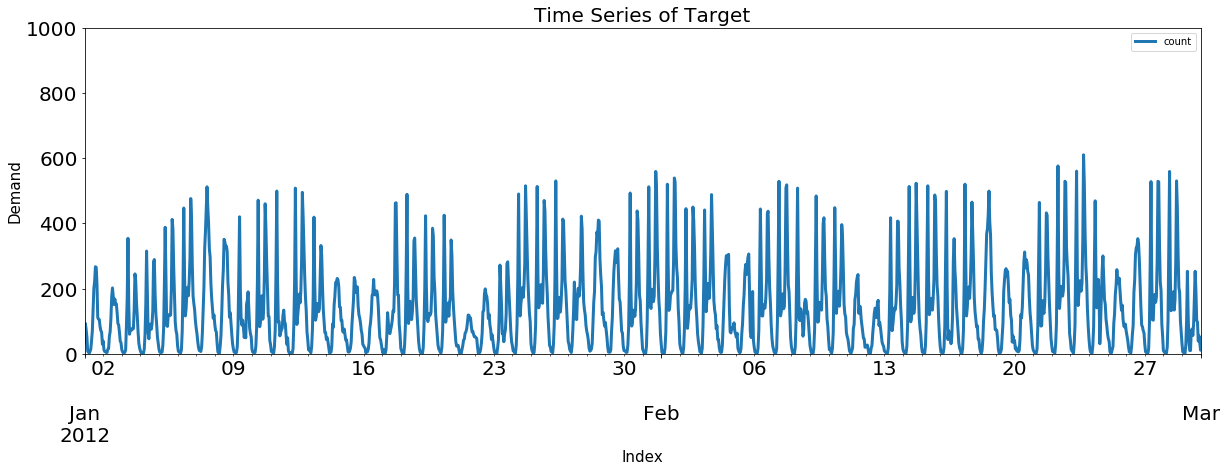

In [13]:
raw_all[['count']].plot(kind='line', figsize=(20,6), linewidth=3, fontsize=20,
                                              xlim=('2012-01-01', '2012-03-01'), ylim=(0,1000))
plt.title('Time Series of Target', fontsize=20)
plt.xlabel('Index', fontsize=15)
plt.ylabel('Demand', fontsize=15)
plt.show()

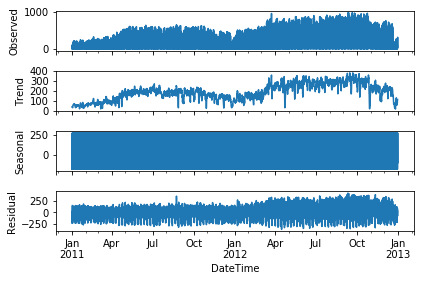

In [14]:
sm.tsa.seasonal_decompose(raw_all['count'], model='additive').plot()
plt.show()

In [15]:
# result = sm.tsa.seasonal_decompose(raw_all['count'], model='additive')
# pd.DataFrame(result.observed - result.trend - result.seasonal).describe()

In [16]:
# sm.tsa.seasonal_decompose(raw_all['count'], model='multiplicative').plot()
# plt.show()

In [17]:
result = sm.tsa.seasonal_decompose(raw_all['count'], model='additive')
Y_trend = pd.DataFrame(result.trend)
Y_trend.fillna(method='ffill', inplace=True)
Y_trend.fillna(method='bfill', inplace=True)
Y_trend.columns = ['count_trend']
Y_seasonal = pd.DataFrame(result.seasonal)
Y_seasonal.fillna(method='ffill', inplace=True)
Y_seasonal.fillna(method='bfill', inplace=True)
Y_seasonal.columns = ['count_seasonal']
pd.concat([raw_all, Y_trend, Y_seasonal], axis=1).isnull().sum()
# pd.concat([raw_all, Y_seasonal], axis=1).isnull().sum()
if 'count_trend' not in raw_all.columns:
    if 'count_seasonal' not in raw_all.columns:
        raw_all = pd.concat([raw_all, Y_trend, Y_seasonal], axis=1)
raw_all

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,count_trend,count_seasonal
DateTime,,,,,,,,,,,,,,
2011-01-01 00:00:00,2011-01-01 00:00:00,1,0,0,1,9.84,14.39,81,0.00,3,13,16,41.06,-134.25
2011-01-01 01:00:00,2011-01-01 01:00:00,1,0,0,1,9.02,13.63,80,0.00,8,32,40,41.06,-154.75
2011-01-01 02:00:00,2011-01-01 02:00:00,1,0,0,1,9.02,13.63,80,0.00,5,27,32,41.06,-165.27
2011-01-01 03:00:00,2011-01-01 03:00:00,1,0,0,1,9.84,14.39,75,0.00,3,10,13,41.06,-176.48
2011-01-01 04:00:00,2011-01-01 04:00:00,1,0,0,1,9.84,14.39,75,0.00,0,1,1,41.06,-181.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-31 19:00:00,2012-12-31 19:00:00,1,0,1,2,10.66,12.88,60,11.00,11,108,119,113.71,122.70
2012-12-31 20:00:00,2012-12-31 20:00:00,1,0,1,2,10.66,12.88,60,11.00,8,81,89,113.71,37.48
2012-12-31 21:00:00,2012-12-31 21:00:00,1,0,1,1,10.66,12.88,60,11.00,7,83,90,113.71,-16.10


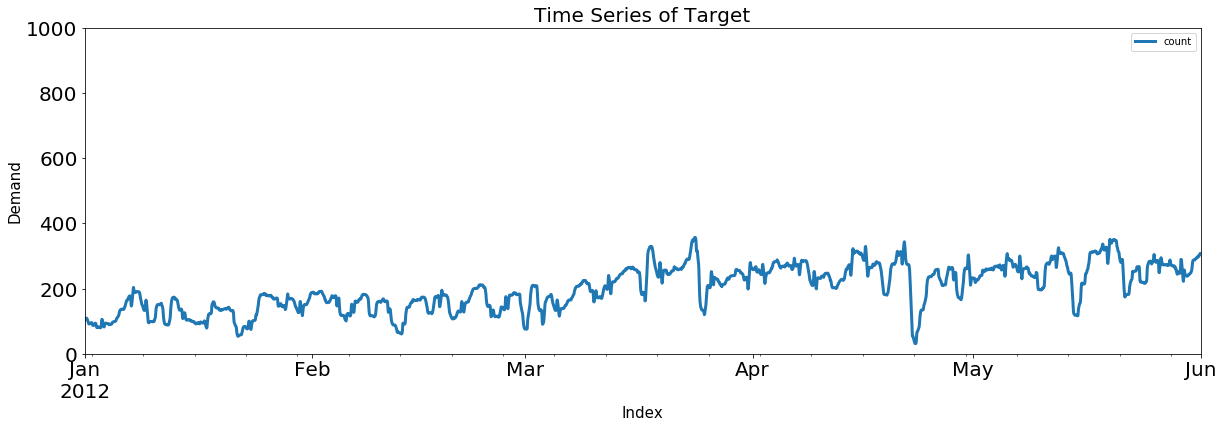

In [18]:
raw_all[['count']].rolling(24).mean().plot(kind='line', figsize=(20,6), linewidth=3, fontsize=20,
                                             xlim=('2012-01-01', '2012-06-01'), ylim=(0,1000))
plt.title('Time Series of Target', fontsize=20)
plt.xlabel('Index', fontsize=15)
plt.ylabel('Demand', fontsize=15)
plt.show()

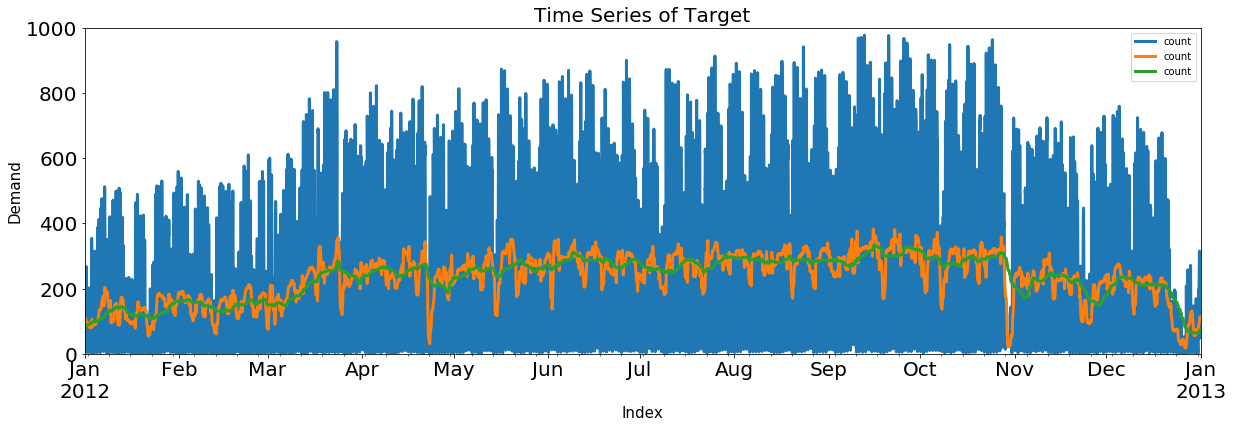

In [19]:
pd.concat([raw_all[['count']],
           raw_all[['count']].rolling(24).mean(),
           raw_all[['count']].rolling(24*7).mean()], axis=1).plot(kind='line', figsize=(20,6), linewidth=3, fontsize=20,
                                                                  xlim=('2012-01-01', '2013-01-01'), ylim=(0,1000))
plt.title('Time Series of Target', fontsize=20)
plt.xlabel('Index', fontsize=15)
plt.ylabel('Demand', fontsize=15)
plt.show()


In [20]:
# raw_all[['count']].rolling(24).mean()

In [21]:
Y_count_Day = raw_all[['count']].rolling(24).mean()
Y_count_Day.fillna(method='ffill', inplace=True)
Y_count_Day.fillna(method='bfill', inplace=True)
Y_count_Day.columns = ['count_Day']
Y_count_Week = raw_all[['count']].rolling(24*7).mean()
Y_count_Week.fillna(method='ffill', inplace=True)
Y_count_Week.fillna(method='bfill', inplace=True)
Y_count_Week.columns = ['count_Week']
if 'count_Day' not in raw_all.columns:
    raw_all = pd.concat([raw_all, Y_count_Day], axis=1)
if 'count_Week' not in raw_all.columns:
    raw_all = pd.concat([raw_all, Y_count_Week], axis=1)
raw_all

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,count_trend,count_seasonal,count_Day,count_Week
DateTime,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,2011-01-01 00:00:00,1,0,0,1,9.84,14.39,81,0.00,3,13,16,41.06,-134.25,41.04,56.11
2011-01-01 01:00:00,2011-01-01 01:00:00,1,0,0,1,9.02,13.63,80,0.00,8,32,40,41.06,-154.75,41.04,56.11
2011-01-01 02:00:00,2011-01-01 02:00:00,1,0,0,1,9.02,13.63,80,0.00,5,27,32,41.06,-165.27,41.04,56.11
2011-01-01 03:00:00,2011-01-01 03:00:00,1,0,0,1,9.84,14.39,75,0.00,3,10,13,41.06,-176.48,41.04,56.11
2011-01-01 04:00:00,2011-01-01 04:00:00,1,0,0,1,9.84,14.39,75,0.00,0,1,1,41.06,-181.67,41.04,56.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-31 19:00:00,2012-12-31 19:00:00,1,0,1,2,10.66,12.88,60,11.00,11,108,119,113.71,122.70,110.17,73.30
2012-12-31 20:00:00,2012-12-31 20:00:00,1,0,1,2,10.66,12.88,60,11.00,8,81,89,113.71,37.48,110.88,73.70
2012-12-31 21:00:00,2012-12-31 21:00:00,1,0,1,1,10.66,12.88,60,11.00,7,83,90,113.71,-16.10,112.67,74.10


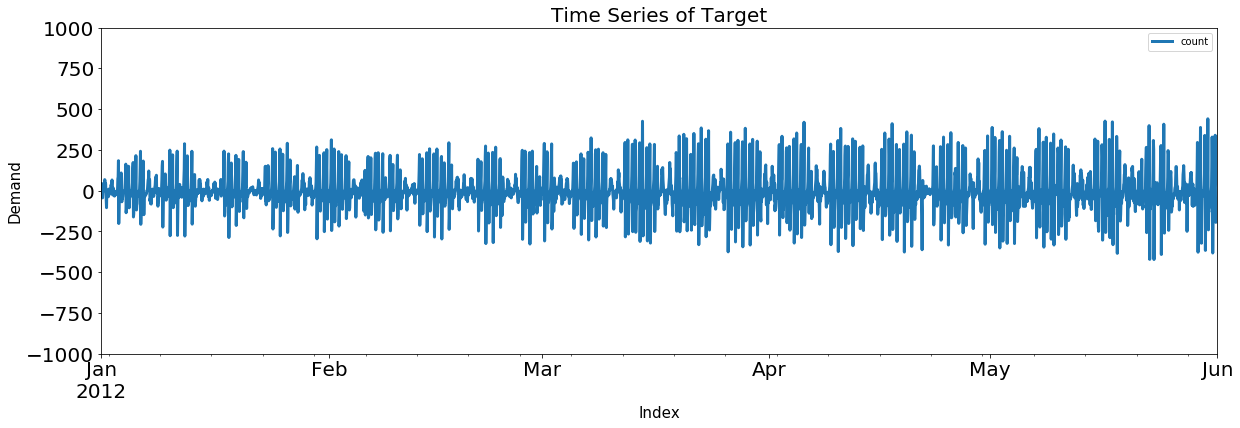

In [22]:
raw_all[['count']].diff().plot(kind='line', figsize=(20,6), linewidth=3, fontsize=20,
                                 xlim=('2012-01-01', '2012-06-01'), ylim=(-1000,1000))
plt.title('Time Series of Target', fontsize=20)
plt.xlabel('Index', fontsize=15)
plt.ylabel('Demand', fontsize=15)
plt.show()

In [23]:
Y_diff = raw_all[['count']].diff()
Y_diff.fillna(method='ffill', inplace=True)
Y_diff.fillna(method='bfill', inplace=True)
Y_diff.columns = ['count_diff']
if 'count_diff' not in raw_all.columns:
    raw_all = pd.concat([raw_all, Y_diff], axis=1)
raw_all

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,count_trend,count_seasonal,count_Day,count_Week,count_diff
DateTime,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,2011-01-01 00:00:00,1,0,0,1,9.84,14.39,81,0.00,3,13,16,41.06,-134.25,41.04,56.11,24.00
2011-01-01 01:00:00,2011-01-01 01:00:00,1,0,0,1,9.02,13.63,80,0.00,8,32,40,41.06,-154.75,41.04,56.11,24.00
2011-01-01 02:00:00,2011-01-01 02:00:00,1,0,0,1,9.02,13.63,80,0.00,5,27,32,41.06,-165.27,41.04,56.11,-8.00
2011-01-01 03:00:00,2011-01-01 03:00:00,1,0,0,1,9.84,14.39,75,0.00,3,10,13,41.06,-176.48,41.04,56.11,-19.00
2011-01-01 04:00:00,2011-01-01 04:00:00,1,0,0,1,9.84,14.39,75,0.00,0,1,1,41.06,-181.67,41.04,56.11,-12.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-31 19:00:00,2012-12-31 19:00:00,1,0,1,2,10.66,12.88,60,11.00,11,108,119,113.71,122.70,110.17,73.30,-3.00
2012-12-31 20:00:00,2012-12-31 20:00:00,1,0,1,2,10.66,12.88,60,11.00,8,81,89,113.71,37.48,110.88,73.70,-30.00
2012-12-31 21:00:00,2012-12-31 21:00:00,1,0,1,1,10.66,12.88,60,11.00,7,83,90,113.71,-16.10,112.67,74.10,1.00


In [24]:
# raw_all[['temp']].ndim

In [25]:
raw_all['temp_group'] = pd.cut(raw_all['temp'], 10)
raw_all

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,count_trend,count_seasonal,count_Day,count_Week,count_diff,temp_group
DateTime,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,2011-01-01 00:00:00,1,0,0,1,9.84,14.39,81,0.00,3,13,16,41.06,-134.25,41.04,56.11,24.00,"(8.856, 12.874]"
2011-01-01 01:00:00,2011-01-01 01:00:00,1,0,0,1,9.02,13.63,80,0.00,8,32,40,41.06,-154.75,41.04,56.11,24.00,"(8.856, 12.874]"
2011-01-01 02:00:00,2011-01-01 02:00:00,1,0,0,1,9.02,13.63,80,0.00,5,27,32,41.06,-165.27,41.04,56.11,-8.00,"(8.856, 12.874]"
2011-01-01 03:00:00,2011-01-01 03:00:00,1,0,0,1,9.84,14.39,75,0.00,3,10,13,41.06,-176.48,41.04,56.11,-19.00,"(8.856, 12.874]"
2011-01-01 04:00:00,2011-01-01 04:00:00,1,0,0,1,9.84,14.39,75,0.00,0,1,1,41.06,-181.67,41.04,56.11,-12.00,"(8.856, 12.874]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-31 19:00:00,2012-12-31 19:00:00,1,0,1,2,10.66,12.88,60,11.00,11,108,119,113.71,122.70,110.17,73.30,-3.00,"(8.856, 12.874]"
2012-12-31 20:00:00,2012-12-31 20:00:00,1,0,1,2,10.66,12.88,60,11.00,8,81,89,113.71,37.48,110.88,73.70,-30.00,"(8.856, 12.874]"
2012-12-31 21:00:00,2012-12-31 21:00:00,1,0,1,1,10.66,12.88,60,11.00,7,83,90,113.71,-16.10,112.67,74.10,1.00,"(8.856, 12.874]"


In [26]:
# raw_all.describe().T
# raw_all.describe(include='all').T

In [27]:
# raw_all.isnull()
# raw_all.isnull().sum()

In [28]:
# pd.options.display.max_rows = 100
# raw_all.dtypes
# pd.options.display.max_rows = 10

In [29]:
# raw_all.datetime.dt
# raw_all.datetime.dt.year

In [30]:
raw_all['Year'] = raw_all.datetime.dt.year
raw_all['Quater'] = raw_all.datetime.dt.quarter
raw_all['Quater_ver2'] = raw_all['Quater'] + (raw_all.Year - raw_all.Year.min()) * 4
raw_all

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,count,count_trend,count_seasonal,count_Day,count_Week,count_diff,temp_group,Year,Quater,Quater_ver2
DateTime,,,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,2011-01-01 00:00:00,1,0,0,1,9.84,14.39,81,0.00,3,...,16,41.06,-134.25,41.04,56.11,24.00,"(8.856, 12.874]",2011,1,1
2011-01-01 01:00:00,2011-01-01 01:00:00,1,0,0,1,9.02,13.63,80,0.00,8,...,40,41.06,-154.75,41.04,56.11,24.00,"(8.856, 12.874]",2011,1,1
2011-01-01 02:00:00,2011-01-01 02:00:00,1,0,0,1,9.02,13.63,80,0.00,5,...,32,41.06,-165.27,41.04,56.11,-8.00,"(8.856, 12.874]",2011,1,1
2011-01-01 03:00:00,2011-01-01 03:00:00,1,0,0,1,9.84,14.39,75,0.00,3,...,13,41.06,-176.48,41.04,56.11,-19.00,"(8.856, 12.874]",2011,1,1
2011-01-01 04:00:00,2011-01-01 04:00:00,1,0,0,1,9.84,14.39,75,0.00,0,...,1,41.06,-181.67,41.04,56.11,-12.00,"(8.856, 12.874]",2011,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-31 19:00:00,2012-12-31 19:00:00,1,0,1,2,10.66,12.88,60,11.00,11,...,119,113.71,122.70,110.17,73.30,-3.00,"(8.856, 12.874]",2012,4,8
2012-12-31 20:00:00,2012-12-31 20:00:00,1,0,1,2,10.66,12.88,60,11.00,8,...,89,113.71,37.48,110.88,73.70,-30.00,"(8.856, 12.874]",2012,4,8
2012-12-31 21:00:00,2012-12-31 21:00:00,1,0,1,1,10.66,12.88,60,11.00,7,...,90,113.71,-16.10,112.67,74.10,1.00,"(8.856, 12.874]",2012,4,8


In [31]:
raw_all['Month'] = raw_all.datetime.dt.month
raw_all['Day'] = raw_all.datetime.dt.day
raw_all['Hour'] = raw_all.datetime.dt.hour
raw_all['DayofWeek'] = raw_all.datetime.dt.dayofweek
raw_all

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,count_Week,count_diff,temp_group,Year,Quater,Quater_ver2,Month,Day,Hour,DayofWeek
DateTime,,,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,2011-01-01 00:00:00,1,0,0,1,9.84,14.39,81,0.00,3,...,56.11,24.00,"(8.856, 12.874]",2011,1,1,1,1,0,5
2011-01-01 01:00:00,2011-01-01 01:00:00,1,0,0,1,9.02,13.63,80,0.00,8,...,56.11,24.00,"(8.856, 12.874]",2011,1,1,1,1,1,5
2011-01-01 02:00:00,2011-01-01 02:00:00,1,0,0,1,9.02,13.63,80,0.00,5,...,56.11,-8.00,"(8.856, 12.874]",2011,1,1,1,1,2,5
2011-01-01 03:00:00,2011-01-01 03:00:00,1,0,0,1,9.84,14.39,75,0.00,3,...,56.11,-19.00,"(8.856, 12.874]",2011,1,1,1,1,3,5
2011-01-01 04:00:00,2011-01-01 04:00:00,1,0,0,1,9.84,14.39,75,0.00,0,...,56.11,-12.00,"(8.856, 12.874]",2011,1,1,1,1,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-31 19:00:00,2012-12-31 19:00:00,1,0,1,2,10.66,12.88,60,11.00,11,...,73.30,-3.00,"(8.856, 12.874]",2012,4,8,12,31,19,0
2012-12-31 20:00:00,2012-12-31 20:00:00,1,0,1,2,10.66,12.88,60,11.00,8,...,73.70,-30.00,"(8.856, 12.874]",2012,4,8,12,31,20,0
2012-12-31 21:00:00,2012-12-31 21:00:00,1,0,1,1,10.66,12.88,60,11.00,7,...,74.10,1.00,"(8.856, 12.874]",2012,4,8,12,31,21,0


In [32]:
# raw_all.info()
# raw_all.describe(include='all').T

In [33]:
# raw_all['count'].shift(1)
# raw_all['count'].shift(-1)

In [34]:
raw_all['count_lag1'] = raw_all['count'].shift(1)
raw_all['count_lag2'] = raw_all['count'].shift(2)

In [35]:
# raw_all.describe().T
# raw_all

In [36]:
# raw_all['count_lag2'].fillna(method='bfill')
# raw_all['count_lag2'].fillna(method='ffill')
# raw_all['count_lag2'].fillna(0)

In [37]:
raw_all['count_lag1'].fillna(method='bfill', inplace=True)
raw_all['count_lag2'].fillna(method='bfill', inplace=True)
raw_all

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,temp_group,Year,Quater,Quater_ver2,Month,Day,Hour,DayofWeek,count_lag1,count_lag2
DateTime,,,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,2011-01-01 00:00:00,1,0,0,1,9.84,14.39,81,0.00,3,...,"(8.856, 12.874]",2011,1,1,1,1,0,5,16.00,16.00
2011-01-01 01:00:00,2011-01-01 01:00:00,1,0,0,1,9.02,13.63,80,0.00,8,...,"(8.856, 12.874]",2011,1,1,1,1,1,5,16.00,16.00
2011-01-01 02:00:00,2011-01-01 02:00:00,1,0,0,1,9.02,13.63,80,0.00,5,...,"(8.856, 12.874]",2011,1,1,1,1,2,5,40.00,16.00
2011-01-01 03:00:00,2011-01-01 03:00:00,1,0,0,1,9.84,14.39,75,0.00,3,...,"(8.856, 12.874]",2011,1,1,1,1,3,5,32.00,40.00
2011-01-01 04:00:00,2011-01-01 04:00:00,1,0,0,1,9.84,14.39,75,0.00,0,...,"(8.856, 12.874]",2011,1,1,1,1,4,5,13.00,32.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-31 19:00:00,2012-12-31 19:00:00,1,0,1,2,10.66,12.88,60,11.00,11,...,"(8.856, 12.874]",2012,4,8,12,31,19,0,122.00,164.00
2012-12-31 20:00:00,2012-12-31 20:00:00,1,0,1,2,10.66,12.88,60,11.00,8,...,"(8.856, 12.874]",2012,4,8,12,31,20,0,119.00,122.00
2012-12-31 21:00:00,2012-12-31 21:00:00,1,0,1,1,10.66,12.88,60,11.00,7,...,"(8.856, 12.874]",2012,4,8,12,31,21,0,89.00,119.00


In [38]:
# pd.get_dummies(raw_all['Quater'])
# pd.get_dummies(raw_all['Quater']).describe().T
# pd.get_dummies(raw_all['Quater'], prefix='Quater_Dummy')
# pd.get_dummies(raw_all['Quater'], prefix='Quater_Dummy', drop_first=True)
# pd.concat([raw_all, pd.get_dummies(raw_all['Quater'], prefix='Quater_Dummy', drop_first=True)
# ], axis=1)

In [39]:
if 'Quater' in raw_all.columns:
    raw_all = pd.concat([raw_all, pd.get_dummies(raw_all['Quater'], prefix='Quater_Dummy', drop_first=True)
], axis=1)
    del raw_all['Quater']
raw_all.describe(include='all').T

,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
datetime,17544,17379,2012-10-29 00:00:00,37,2011-01-01 00:00:00,2012-12-31 23:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
season,"17,544.00",NaN,NaN,NaN,NaN,NaN,2.50,1.11,1.00,2.00,3.00,3.00,4.00
holiday,"17,544.00",NaN,NaN,NaN,NaN,NaN,0.03,0.17,0.00,0.00,0.00,0.00,1.00
workingday,"17,544.00",NaN,NaN,NaN,NaN,NaN,0.68,0.47,0.00,0.00,1.00,1.00,1.00
weather,"17,544.00",NaN,NaN,NaN,NaN,NaN,1.43,0.65,1.00,1.00,1.00,2.00,4.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
count_lag1,"17,544.00",NaN,NaN,NaN,NaN,NaN,187.79,181.35,1.00,38.00,140.00,279.00,977.00
count_lag2,"17,544.00",NaN,NaN,NaN,NaN,NaN,187.79,181.35,1.00,38.00,140.00,279.00,977.00
Quater_Dummy_2,"17,544.00",NaN,NaN,NaN,NaN,NaN,0.25,0.43,0.00,0.00,0.00,0.00,1.00
Quater_Dummy_3,"17,544.00",NaN,NaN,NaN,NaN,NaN,0.25,0.43,0.00,0.00,0.00,1.00,1.00


## Code Summary

In [40]:
### Functinalize
### Feature engineering of default
def non_feature_engineering(raw):
    if 'datetime' in raw.columns:
        raw['datetime'] = pd.to_datetime(raw['datetime'])
        raw['DateTime'] = pd.to_datetime(raw['datetime'])
    if raw.index.dtype == 'int64':
        raw.set_index('DateTime', inplace=True)
    # bring back
    # if raw.index.dtype != 'int64':
    #     raw.reset_index(drop=False, inplace=True)
    raw = raw.asfreq('H', method='ffill')
    raw_nfe = raw.copy()
    return raw_nfe
# raw_rd = non_feature_engineering(raw_all)


### Feature engineering of all
def feature_engineering(raw):
    if 'datetime' in raw.columns:
        raw['datetime'] = pd.to_datetime(raw['datetime'])
        raw['DateTime'] = pd.to_datetime(raw['datetime'])

    if raw.index.dtype == 'int64':
        raw.set_index('DateTime', inplace=True)

    raw = raw.asfreq('H', method='ffill')

    result = sm.tsa.seasonal_decompose(raw['count'], model='additive')
    Y_trend = pd.DataFrame(result.trend)
    Y_trend.fillna(method='ffill', inplace=True)
    Y_trend.fillna(method='bfill', inplace=True)
    Y_trend.columns = ['count_trend']
    Y_seasonal = pd.DataFrame(result.seasonal)
    Y_seasonal.fillna(method='ffill', inplace=True)
    Y_seasonal.fillna(method='bfill', inplace=True)
    Y_seasonal.columns = ['count_seasonal']
    pd.concat([raw, Y_trend, Y_seasonal], axis=1).isnull().sum()
    if 'count_trend' not in raw.columns:
        if 'count_seasonal' not in raw.columns:
            raw = pd.concat([raw, Y_trend, Y_seasonal], axis=1)

    Y_count_Day = raw[['count']].rolling(24).mean()
    Y_count_Day.fillna(method='ffill', inplace=True)
    Y_count_Day.fillna(method='bfill', inplace=True)
    Y_count_Day.columns = ['count_Day']
    Y_count_Week = raw[['count']].rolling(24*7).mean()
    Y_count_Week.fillna(method='ffill', inplace=True)
    Y_count_Week.fillna(method='bfill', inplace=True)
    Y_count_Week.columns = ['count_Week']
    if 'count_Day' not in raw.columns:
        raw = pd.concat([raw, Y_count_Day], axis=1)
    if 'count_Week' not in raw.columns:
        raw = pd.concat([raw, Y_count_Week], axis=1)

    Y_diff = raw[['count']].diff()
    Y_diff.fillna(method='ffill', inplace=True)
    Y_diff.fillna(method='bfill', inplace=True)
    Y_diff.columns = ['count_diff']
    if 'count_diff' not in raw.columns:
        raw = pd.concat([raw, Y_diff], axis=1)

    raw['temp_group'] = pd.cut(raw['temp'], 10)
    raw['Year'] = raw.datetime.dt.year
    raw['Quater'] = raw.datetime.dt.quarter
    raw['Quater_ver2'] = raw['Quater'] + (raw.Year - raw.Year.min()) * 4
    raw['Month'] = raw.datetime.dt.month
    raw['Day'] = raw.datetime.dt.day
    raw['Hour'] = raw.datetime.dt.hour
    raw['DayofWeek'] = raw.datetime.dt.dayofweek

    raw['count_lag1'] = raw['count'].shift(1)
    raw['count_lag2'] = raw['count'].shift(2)
    raw['count_lag1'].fillna(method='bfill', inplace=True)
    raw['count_lag2'].fillna(method='bfill', inplace=True)

    if 'Quater' in raw.columns:
        if 'Quater_Dummy' not in ['_'.join(col.split('_')[:2]) for col in raw.columns]:
            raw = pd.concat([raw, pd.get_dummies(raw['Quater'], 
                                                 prefix='Quater_Dummy', drop_first=True)], axis=1)
            del raw['Quater']
    raw_fe = raw.copy()
    return raw_fe
# raw_fe = feature_engineering(raw_all)

In [41]:
raw_fe = feature_engineering(raw_all)

# Data Understanding: 추출된 패턴이 Y예측에 도움될지 시각적을 확인하기
**1. Import Library**  
**2. Data Loading**  [(Data Source and Description)](https://www.kaggle.com/c/bike-sharing-demand/data)  
**3. Feature Engineering(Rearrange of Data)**  
**4. Data Understanding(Descriptive Statistics and Getting Insight from Features)**  

In [42]:
# raw_fe.describe(include='all').T

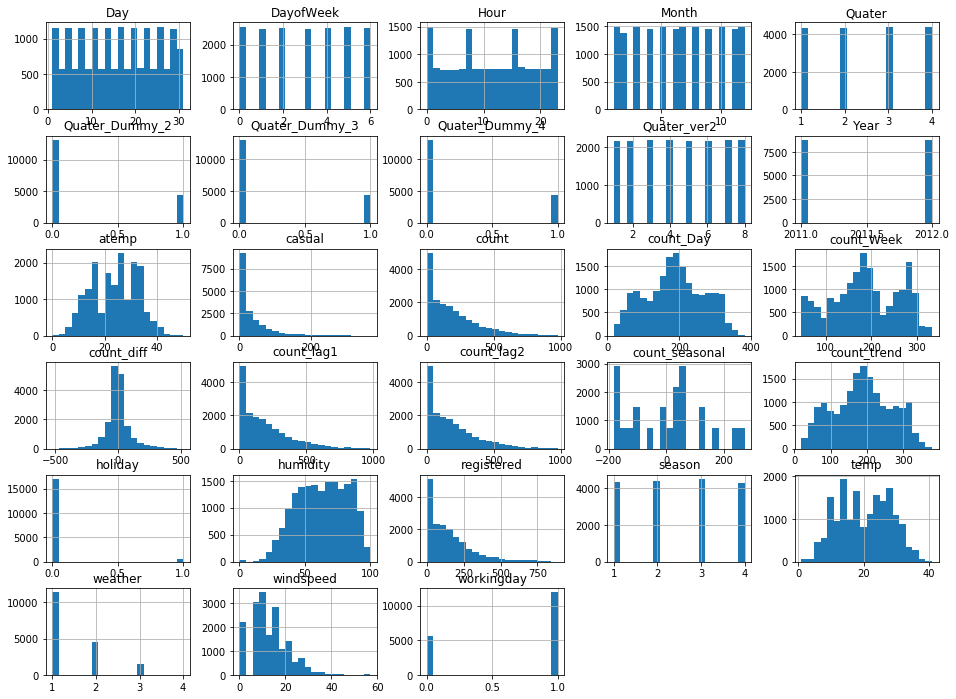

In [43]:
raw_fe.hist(bins=20, grid=True, figsize=(16,12))
plt.show()

(0, 1000)

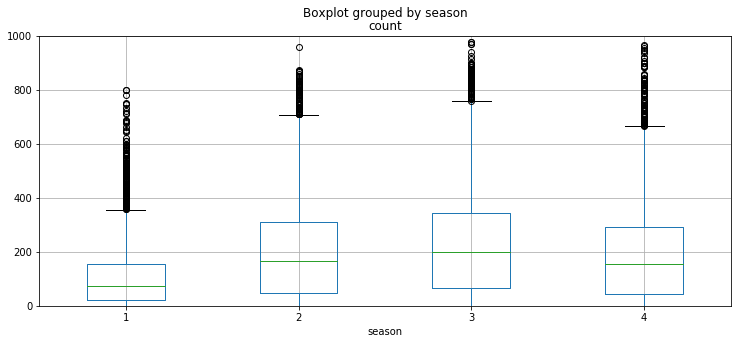

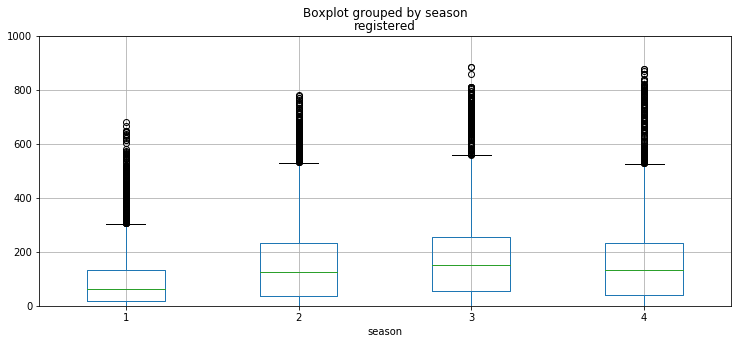

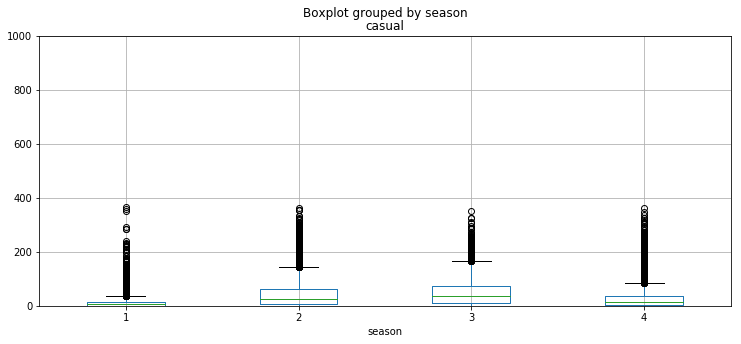

In [44]:
raw_fe.boxplot(column='count', by='season', grid=True, figsize=(12,5))
plt.ylim(0,1000)
raw_fe.boxplot(column='registered', by='season', grid=True, figsize=(12,5))
plt.ylim(0,1000)
raw_fe.boxplot(column='casual', by='season', grid=True, figsize=(12,5))
plt.ylim(0,1000)

(0, 1000)

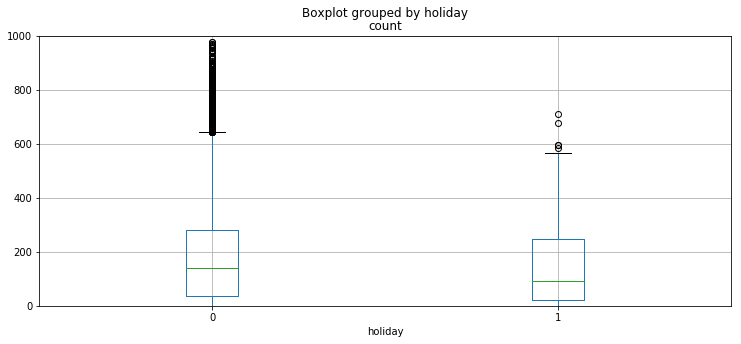

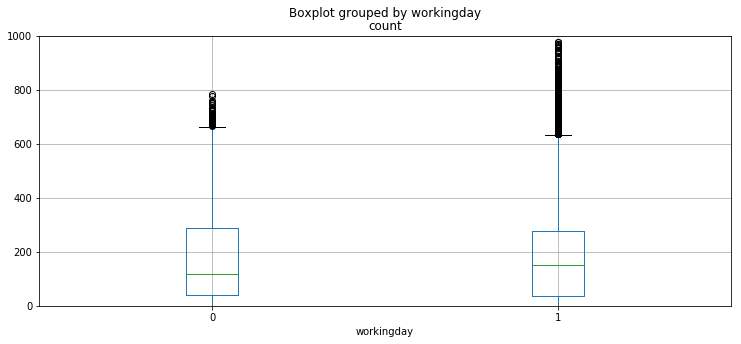

In [45]:
raw_fe.boxplot(column='count', by='holiday', grid=True, figsize=(12,5))
plt.ylim(0,1000)
raw_fe.boxplot(column='count', by='workingday', grid=True, figsize=(12,5))
plt.ylim(0,1000)

In [46]:
# raw_fe[raw_all.holiday == 0]

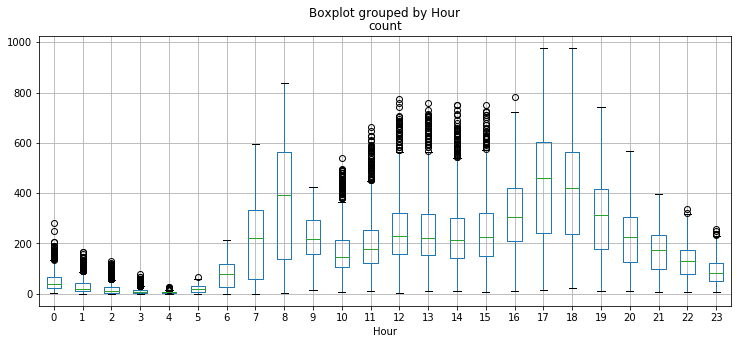

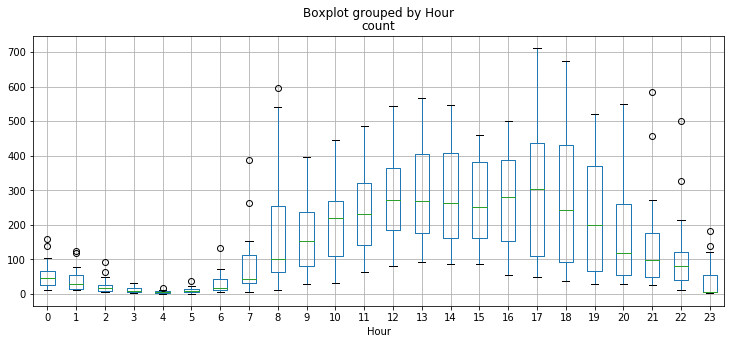

In [47]:
raw_fe[raw_all.holiday == 0].boxplot(column='count', by='Hour', grid=True, figsize=(12,5))
plt.show()
raw_fe[raw_all.holiday == 1].boxplot(column='count', by='Hour', grid=True, figsize=(12,5))
plt.show()

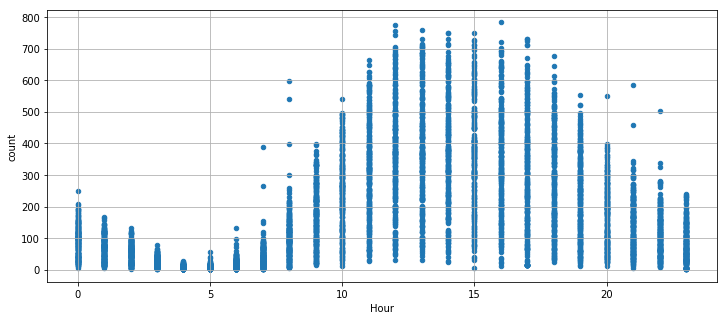

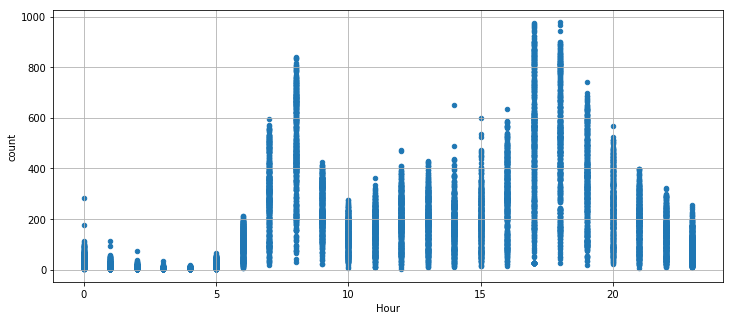

In [48]:
raw_fe[raw_all.workingday == 0].plot.scatter(y='count', x='Hour', grid=True, figsize=(12,5))
plt.show()
raw_fe[raw_all.workingday == 1].plot.scatter(y='count', x='Hour', grid=True, figsize=(12,5))
plt.show()

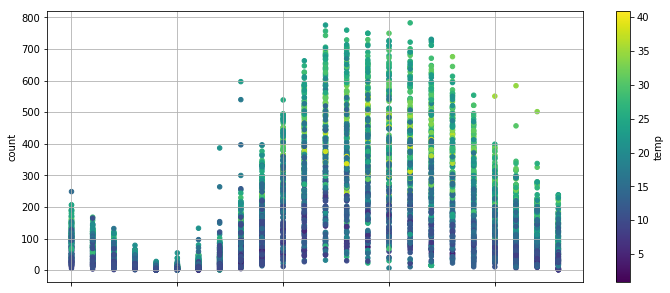

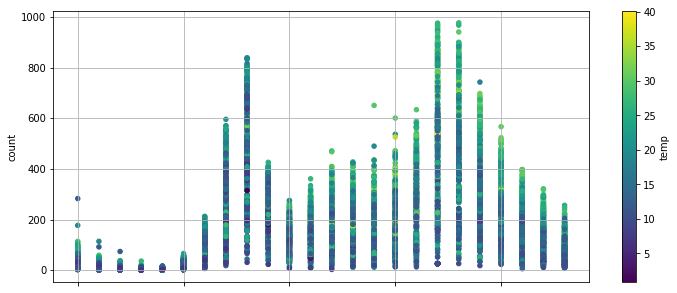

In [49]:
raw_fe[raw_fe.workingday == 0].plot.scatter(y='count', x='Hour', c='temp', grid=True, figsize=(12,5), colormap='viridis')
plt.show()
raw_fe[raw_fe.workingday == 1].plot.scatter(y='count', x='Hour', c='temp', grid=True, figsize=(12,5), colormap='viridis')
plt.show()

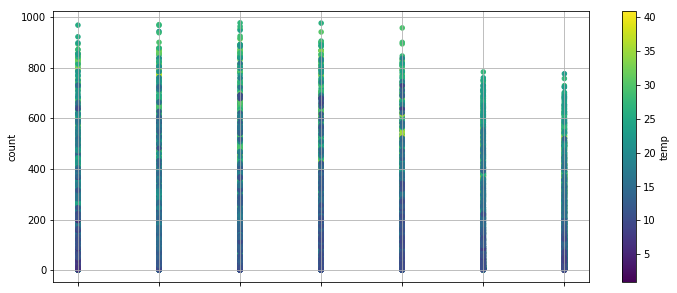

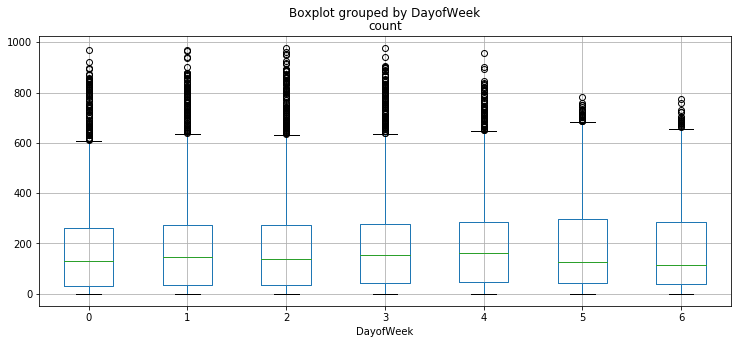

In [50]:
raw_fe.plot.scatter(y='count', x='DayofWeek', c='temp', grid=True, figsize=(12,5), colormap='viridis')
plt.show()
raw_fe.boxplot(column='count', by='DayofWeek', grid=True, figsize=(12,5))
plt.show()

(0, 1000)

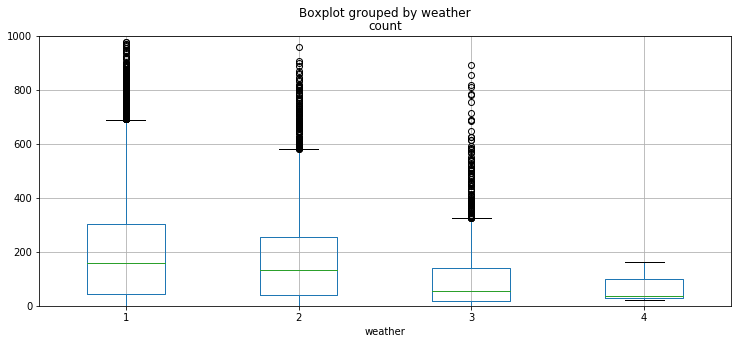

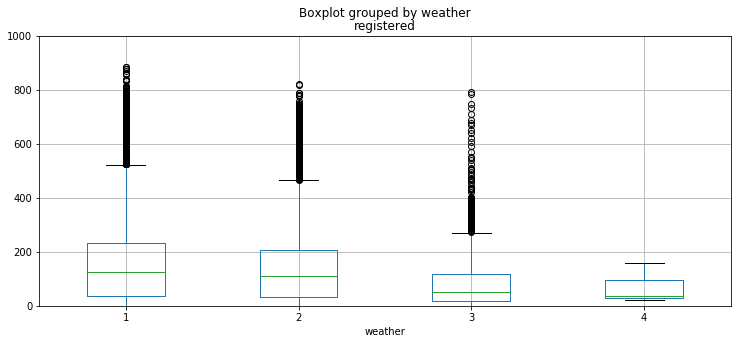

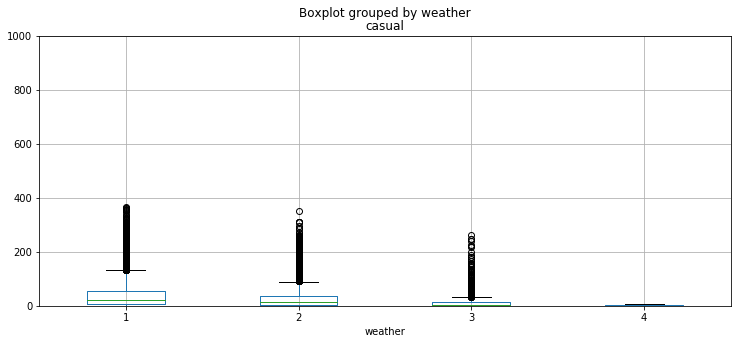

In [51]:
raw_fe.boxplot(column='count', by='weather', grid=True, figsize=(12,5))
plt.ylim(0,1000)
raw_fe.boxplot(column='registered', by='weather', grid=True, figsize=(12,5))
plt.ylim(0,1000)
raw_fe.boxplot(column='casual', by='weather', grid=True, figsize=(12,5))
plt.ylim(0,1000)

In [52]:
# pd.concat([raw_fe.dtypes, raw_fe.describe(include='all').T], axis=1)

In [53]:
# raw_fe['weather'].value_counts()

In [54]:
pd.DataFrame(raw_fe['weather'].value_counts()/raw_fe['weather'].value_counts().sum()*100).T

,1,2,3,4
weather,65.29,26.01,8.68,0.02


In [55]:
# pd.crosstab(index=raw_fe['count'], columns=raw_fe['weather'], margins=True)

In [56]:
sub_table = pd.crosstab(index=raw_fe['count'], columns=raw_fe['weather'], margins=True)
sub_table/sub_table.loc['All']*100

weather,1,2,3,4,All
count,,,,,
1,0.87,0.99,1.77,0.00,0.98
2,1.19,1.29,2.43,0.00,1.32
3,1.19,1.45,2.69,0.00,1.39
4,1.30,1.36,2.36,0.00,1.41
5,1.43,1.38,2.36,0.00,1.50
...,...,...,...,...,...
968,0.01,0.00,0.00,0.00,0.01
970,0.01,0.00,0.00,0.00,0.01
976,0.01,0.00,0.00,0.00,0.01


In [57]:
# raw_fe.groupby('weather').describe().T

In [58]:
# raw_fe.groupby(['weather', 'DayofWeek']).count()
# raw_fe.groupby(['weather', 'DayofWeek']).mean()

In [59]:
raw_fe.groupby(['weather', 'DayofWeek']).describe()

Day                                              Hour  \
                     count  mean  std   min   25%   50%   75%   max    count   
weather DayofWeek                                                              
1       0         1,594.00 15.64 8.96  1.00  8.00 15.00 24.00 31.00 1,594.00   
        1         1,527.00 16.16 9.11  1.00  8.00 16.00 24.50 31.00 1,527.00   
        2         1,577.00 15.86 8.83  1.00  8.00 16.00 24.00 31.00 1,577.00   
        3         1,660.00 15.01 8.97  1.00  7.00 14.00 23.00 31.00 1,660.00   
        4         1,649.00 15.41 8.70  1.00  8.00 15.00 23.00 31.00 1,649.00   
...                    ...   ...  ...   ...   ...   ...   ...   ...      ...   
3       5           201.00 16.32 9.61  1.00  8.00 16.00 25.00 31.00   201.00   
        6           170.00 14.36 9.42  1.00  6.00 14.00 22.00 30.00   170.00   
4       0             1.00  9.00  nan  9.00  9.00  9.00  9.00  9.00     1.00   
        2             1.00 26.00  nan 26.00 26.00 26.00 26.00 26.00     1.00   
        5             1.00 21.00  nan 21.00 21.00 21.00 21.00 21.00     1.00   

                        ...  windspeed       workingday                      \
                   mean ...        75%   max      count mean  std  min  25%   
weather DayofWeek       ...                                                   
1       0         11.39 ...      19.00 48.00   1,594.00 0.86 0.35 0.00 1.00   
        1         12.17 ...      19.00 52.00   1,527.00 1.00 0.06 0.00 1.00   
        2         11.60 ...      17.00 39.00   1,577.00 0.99 0.12 0.00 1.00   
        3         11.90 ...      19.00 46.00   1,660.00 0.97 0.17 0.00 1.00   
        4         11.57 ...      17.00 54.00   1,649.00 0.97 0.16 0.00 1.00   
...                 ... ...        ...   ...        ...  ...  ...  ...  ...   
3       5         12.18 ...      24.00 56.00     201.00 0.00 0.00 0.00 0.00   
        6         13.77 ...      22.00 57.00     170.00 0.00 0.00 0.00 0.00   
4       0         18.00 ...       6.00  6.00       1.00 1.00  nan 1.00 1.00   
        2         16.00 ...      22.00 22.00       1.00 1.00  nan 1.00 1.00   
        5          1.00 ...      13.00 13.00       1.00 0.00  nan 0.00 0.00   

                                  
                   50%  75%  max  
weather DayofWeek                 
1       0         1.00 1.00 1.00  
        1         1.00 1.00 1.00  
        2         1.00 1.00 1.00  
        3         1.00 1.00 1.00  
        4         1.00 1.00 1.00  
...                ...  ...  ...  
3       5         0.00 0.00 0.00  
        6         0.00 0.00 0.00  
4       0         1.00 1.00 1.00  
        2         1.00 1.00 1.00  
        5         0.00 0.00 0.00  

[24 rows x 208 columns]

In [60]:
# raw_fe.groupby(['weather', 'DayofWeek']).agg({'count':'mean'})
# raw_fe.groupby(['weather', 'DayofWeek']).agg({'count':[sum, min, max]})

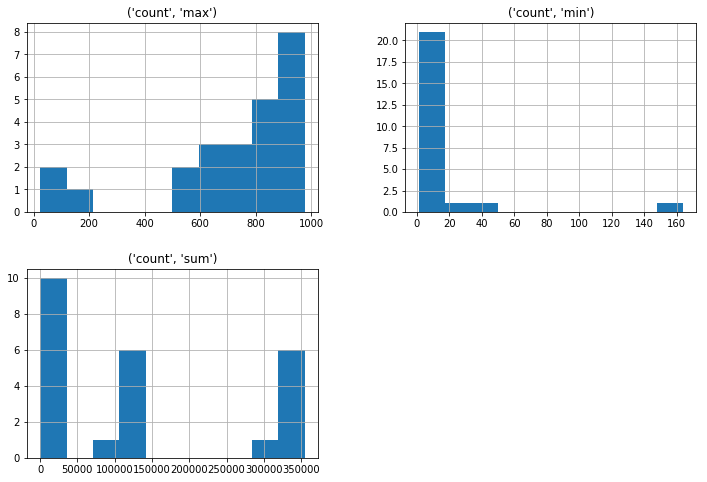

In [61]:
raw_fe.groupby(['weather', 'DayofWeek']).agg({'count':[sum, min, max]}).hist(grid=True, figsize=(12,8))
plt.show()

In [62]:
# raw_fe.groupby('weather').groups.keys()
# raw_fe.groupby('weather').groups.items()

In [63]:
for key, item in raw_fe.groupby('weather'):
    display(key, item)
    display(raw_fe.groupby('weather').get_group(key).head())

1

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,Day,Hour,DayofWeek,count_lag1,count_lag2,Quater_Dummy_2,Quater_Dummy_3,Quater_Dummy_4,DateTime,Quater
DateTime,,,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,2011-01-01 00:00:00,1,0,0,1,9.84,14.39,81,0.00,3,...,1,0,5,16.00,16.00,0,0,0,2011-01-01 00:00:00,1
2011-01-01 01:00:00,2011-01-01 01:00:00,1,0,0,1,9.02,13.63,80,0.00,8,...,1,1,5,16.00,16.00,0,0,0,2011-01-01 01:00:00,1
2011-01-01 02:00:00,2011-01-01 02:00:00,1,0,0,1,9.02,13.63,80,0.00,5,...,1,2,5,40.00,16.00,0,0,0,2011-01-01 02:00:00,1
2011-01-01 03:00:00,2011-01-01 03:00:00,1,0,0,1,9.84,14.39,75,0.00,3,...,1,3,5,32.00,40.00,0,0,0,2011-01-01 03:00:00,1
2011-01-01 04:00:00,2011-01-01 04:00:00,1,0,0,1,9.84,14.39,75,0.00,0,...,1,4,5,13.00,32.00,0,0,0,2011-01-01 04:00:00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-31 07:00:00,2012-12-31 07:00:00,1,0,1,1,6.56,9.09,64,9.00,2,...,31,7,0,40.00,9.00,0,0,1,2012-12-31 07:00:00,4
2012-12-31 08:00:00,2012-12-31 08:00:00,1,0,1,1,5.74,7.58,69,9.00,9,...,31,8,0,85.00,40.00,0,0,1,2012-12-31 08:00:00,4
2012-12-31 21:00:00,2012-12-31 21:00:00,1,0,1,1,10.66,12.88,60,11.00,7,...,31,21,0,89.00,119.00,0,0,1,2012-12-31 21:00:00,4


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,Day,Hour,DayofWeek,count_lag1,count_lag2,Quater_Dummy_2,Quater_Dummy_3,Quater_Dummy_4,DateTime,Quater
DateTime,,,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,2011-01-01 00:00:00,1,0,0,1,9.84,14.39,81,0.00,3,...,1,0,5,16.00,16.00,0,0,0,2011-01-01 00:00:00,1
2011-01-01 01:00:00,2011-01-01 01:00:00,1,0,0,1,9.02,13.63,80,0.00,8,...,1,1,5,16.00,16.00,0,0,0,2011-01-01 01:00:00,1
2011-01-01 02:00:00,2011-01-01 02:00:00,1,0,0,1,9.02,13.63,80,0.00,5,...,1,2,5,40.00,16.00,0,0,0,2011-01-01 02:00:00,1
2011-01-01 03:00:00,2011-01-01 03:00:00,1,0,0,1,9.84,14.39,75,0.00,3,...,1,3,5,32.00,40.00,0,0,0,2011-01-01 03:00:00,1
2011-01-01 04:00:00,2011-01-01 04:00:00,1,0,0,1,9.84,14.39,75,0.00,0,...,1,4,5,13.00,32.00,0,0,0,2011-01-01 04:00:00,1


2

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,Day,Hour,DayofWeek,count_lag1,count_lag2,Quater_Dummy_2,Quater_Dummy_3,Quater_Dummy_4,DateTime,Quater
DateTime,,,,,,,,,,,,,,,,,,,,,
2011-01-01 05:00:00,2011-01-01 05:00:00,1,0,0,2,9.84,12.88,75,6.00,0,...,1,5,5,1.00,13.00,0,0,0,2011-01-01 05:00:00,1
2011-01-01 13:00:00,2011-01-01 13:00:00,1,0,0,2,18.86,22.73,72,20.00,47,...,1,13,5,84.00,56.00,0,0,0,2011-01-01 13:00:00,1
2011-01-01 14:00:00,2011-01-01 14:00:00,1,0,0,2,18.86,22.73,72,19.00,35,...,1,14,5,94.00,84.00,0,0,0,2011-01-01 14:00:00,1
2011-01-01 15:00:00,2011-01-01 15:00:00,1,0,0,2,18.04,21.97,77,20.00,40,...,1,15,5,106.00,94.00,0,0,0,2011-01-01 15:00:00,1
2011-01-01 16:00:00,2011-01-01 16:00:00,1,0,0,2,17.22,21.21,82,20.00,41,...,1,16,5,110.00,106.00,0,0,0,2011-01-01 16:00:00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-31 16:00:00,2012-12-31 16:00:00,1,0,1,2,10.66,12.88,48,13.00,30,...,31,16,0,315.00,247.00,0,0,1,2012-12-31 16:00:00,4
2012-12-31 17:00:00,2012-12-31 17:00:00,1,0,1,2,10.66,14.39,48,6.00,14,...,31,17,0,214.00,315.00,0,0,1,2012-12-31 17:00:00,4
2012-12-31 18:00:00,2012-12-31 18:00:00,1,0,1,2,10.66,13.63,48,9.00,10,...,31,18,0,164.00,214.00,0,0,1,2012-12-31 18:00:00,4


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,Day,Hour,DayofWeek,count_lag1,count_lag2,Quater_Dummy_2,Quater_Dummy_3,Quater_Dummy_4,DateTime,Quater
DateTime,,,,,,,,,,,,,,,,,,,,,
2011-01-01 05:00:00,2011-01-01 05:00:00,1,0,0,2,9.84,12.88,75,6.00,0,...,1,5,5,1.00,13.00,0,0,0,2011-01-01 05:00:00,1
2011-01-01 13:00:00,2011-01-01 13:00:00,1,0,0,2,18.86,22.73,72,20.00,47,...,1,13,5,84.00,56.00,0,0,0,2011-01-01 13:00:00,1
2011-01-01 14:00:00,2011-01-01 14:00:00,1,0,0,2,18.86,22.73,72,19.00,35,...,1,14,5,94.00,84.00,0,0,0,2011-01-01 14:00:00,1
2011-01-01 15:00:00,2011-01-01 15:00:00,1,0,0,2,18.04,21.97,77,20.00,40,...,1,15,5,106.00,94.00,0,0,0,2011-01-01 15:00:00,1
2011-01-01 16:00:00,2011-01-01 16:00:00,1,0,0,2,17.22,21.21,82,20.00,41,...,1,16,5,110.00,106.00,0,0,0,2011-01-01 16:00:00,1


3

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,Day,Hour,DayofWeek,count_lag1,count_lag2,Quater_Dummy_2,Quater_Dummy_3,Quater_Dummy_4,DateTime,Quater
DateTime,,,,,,,,,,,,,,,,,,,,,
2011-01-01 18:00:00,2011-01-01 18:00:00,1,0,0,3,17.22,21.21,88,17.00,9,...,1,18,5,67.00,93.00,0,0,0,2011-01-01 18:00:00,1
2011-01-01 19:00:00,2011-01-01 19:00:00,1,0,0,3,17.22,21.21,88,17.00,6,...,1,19,5,35.00,67.00,0,0,0,2011-01-01 19:00:00,1
2011-01-02 06:00:00,2011-01-02 06:00:00,1,0,0,3,17.22,21.21,77,20.00,0,...,2,6,6,3.00,3.00,0,0,0,2011-01-02 06:00:00,1
2011-01-02 08:00:00,2011-01-02 08:00:00,1,0,0,3,16.40,20.45,71,15.00,0,...,2,8,6,1.00,2.00,0,0,0,2011-01-02 08:00:00,1
2011-01-02 14:00:00,2011-01-02 14:00:00,1,0,0,3,14.76,17.43,76,13.00,4,...,2,14,6,75.00,93.00,0,0,0,2011-01-02 14:00:00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-27 01:00:00,2012-12-27 01:00:00,1,0,1,3,9.84,9.85,93,30.00,0,...,27,1,3,3.00,10.00,0,0,1,2012-12-27 01:00:00,4
2012-12-29 10:00:00,2012-12-29 10:00:00,1,0,0,3,10.66,12.12,81,9.00,6,...,29,10,5,49.00,44.00,0,0,1,2012-12-29 10:00:00,4
2012-12-29 11:00:00,2012-12-29 11:00:00,1,0,0,3,8.20,12.12,93,6.00,7,...,29,11,5,41.00,49.00,0,0,1,2012-12-29 11:00:00,4


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,Day,Hour,DayofWeek,count_lag1,count_lag2,Quater_Dummy_2,Quater_Dummy_3,Quater_Dummy_4,DateTime,Quater
DateTime,,,,,,,,,,,,,,,,,,,,,
2011-01-01 18:00:00,2011-01-01 18:00:00,1,0,0,3,17.22,21.21,88,17.00,9,...,1,18,5,67.00,93.00,0,0,0,2011-01-01 18:00:00,1
2011-01-01 19:00:00,2011-01-01 19:00:00,1,0,0,3,17.22,21.21,88,17.00,6,...,1,19,5,35.00,67.00,0,0,0,2011-01-01 19:00:00,1
2011-01-02 06:00:00,2011-01-02 06:00:00,1,0,0,3,17.22,21.21,77,20.00,0,...,2,6,6,3.00,3.00,0,0,0,2011-01-02 06:00:00,1
2011-01-02 08:00:00,2011-01-02 08:00:00,1,0,0,3,16.40,20.45,71,15.00,0,...,2,8,6,1.00,2.00,0,0,0,2011-01-02 08:00:00,1
2011-01-02 14:00:00,2011-01-02 14:00:00,1,0,0,3,14.76,17.43,76,13.00,4,...,2,14,6,75.00,93.00,0,0,0,2011-01-02 14:00:00,1


4

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,Day,Hour,DayofWeek,count_lag1,count_lag2,Quater_Dummy_2,Quater_Dummy_3,Quater_Dummy_4,DateTime,Quater
DateTime,,,,,,,,,,,,,,,,,,,,,
2011-01-26 16:00:00,2011-01-26 16:00:00,1,0,1,4,9.02,9.85,93,22.00,1,...,26,16,2,43.00,36.00,0,0,0,2011-01-26 16:00:00,1
2012-01-09 18:00:00,2012-01-09 18:00:00,1,0,1,4,8.20,11.37,86,6.00,6,...,9,18,0,152.00,49.00,0,0,0,2012-01-09 18:00:00,1
2012-01-21 01:00:00,2012-01-21 01:00:00,1,0,0,4,5.74,6.82,86,13.00,1,...,21,1,5,24.00,38.00,0,0,0,2012-01-21 01:00:00,1


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,Day,Hour,DayofWeek,count_lag1,count_lag2,Quater_Dummy_2,Quater_Dummy_3,Quater_Dummy_4,DateTime,Quater
DateTime,,,,,,,,,,,,,,,,,,,,,
2011-01-26 16:00:00,2011-01-26 16:00:00,1,0,1,4,9.02,9.85,93,22.00,1,...,26,16,2,43.00,36.00,0,0,0,2011-01-26 16:00:00,1
2012-01-09 18:00:00,2012-01-09 18:00:00,1,0,1,4,8.20,11.37,86,6.00,6,...,9,18,0,152.00,49.00,0,0,0,2012-01-09 18:00:00,1
2012-01-21 01:00:00,2012-01-21 01:00:00,1,0,0,4,5.74,6.82,86,13.00,1,...,21,1,5,24.00,38.00,0,0,0,2012-01-21 01:00:00,1


In [64]:
# pd.cut(raw_fe['temp'], 10)
# pd.cut(raw_fe['temp'], 10).value_counts()

In [65]:
raw_fe.groupby(pd.cut(raw_fe['temp'], 10)).describe().T

temp          (0.78, 4.838]  (4.838, 8.856]  (8.856, 12.874]  \
season count         124.00        1,018.00         2,466.00   
       mean            1.00            1.22             2.02   
       std             0.00            0.75             1.36   
       min             1.00            1.00             1.00   
       25%             1.00            1.00             1.00   
...                     ...             ...              ...   
Quater min             1.00            1.00             1.00   
       25%             1.00            1.00             1.00   
       50%             1.00            1.00             1.00   
       75%             1.00            1.00             4.00   
       max             1.00            4.00             4.00   

temp          (12.874, 16.892]  (16.892, 20.91]  (20.91, 24.928]  \
season count          2,926.00         2,474.00         2,687.00   
       mean               2.51             2.66             2.71   
       std                1.36             1.21             0.96   
       min                1.00             1.00             1.00   
       25%                1.00             2.00             2.00   
...                        ...              ...              ...   
Quater min                1.00             1.00             1.00   
       25%                1.00             2.00             2.00   
       50%                2.00             2.00             2.00   
       75%                4.00             4.00             3.00   
       max                4.00             4.00             4.00   

temp          (24.928, 28.946]  (28.946, 32.964]  (32.964, 36.982]  \
season count          3,164.00          1,976.00            625.00   
       mean               2.73              2.80              2.86   
       std                0.65              0.44              0.35   
       min                1.00              1.00              2.00   
       25%                2.00              3.00              3.00   
...                        ...               ...               ...   
Quater min                1.00              1.00              2.00   
       25%                2.00              2.00              2.00   
       50%                3.00              3.00              3.00   
       75%                3.00              3.00              3.00   
       max                4.00              4.00              3.00   

temp          (36.982, 41.0]  
season count           84.00  
       mean             2.90  
       std              0.30  
       min              2.00  
       25%              3.00  
...                      ...  
Quater min              2.00  
       25%              3.00  
       50%              3.00  
       75%              3.00  
       max              3.00  

[224 rows x 10 columns]

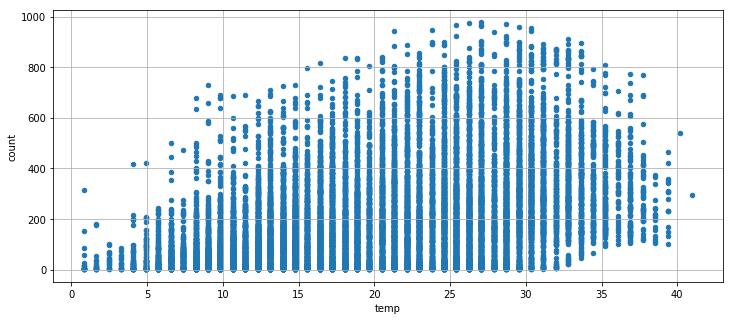

In [66]:
raw_fe.plot.scatter(y='count', x='temp', grid=True, figsize=(12,5))
plt.show()

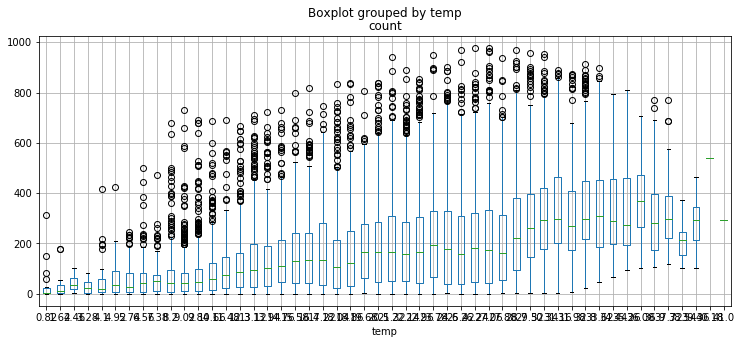

In [67]:
raw_fe.boxplot(column='count', by='temp', grid=True, figsize=(12,5))
plt.show()

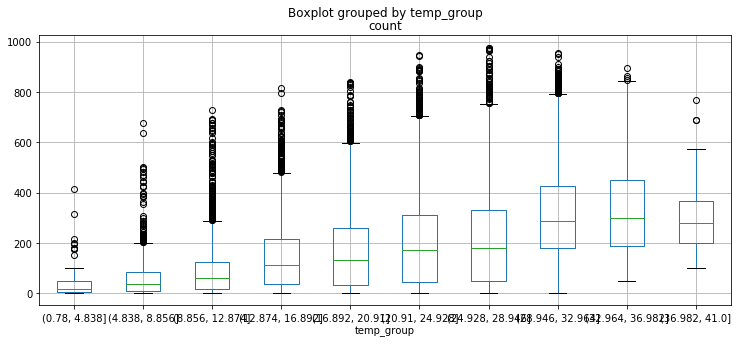

In [68]:
raw_fe.boxplot(column='count', by='temp_group', grid=True, figsize=(12,5))
plt.show()

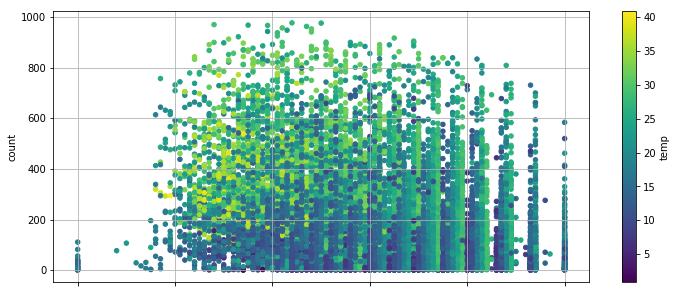

In [69]:
raw_fe.plot.scatter(y='count', x='humidity', c='temp', grid=True, figsize=(12,5), colormap='viridis')
plt.show()

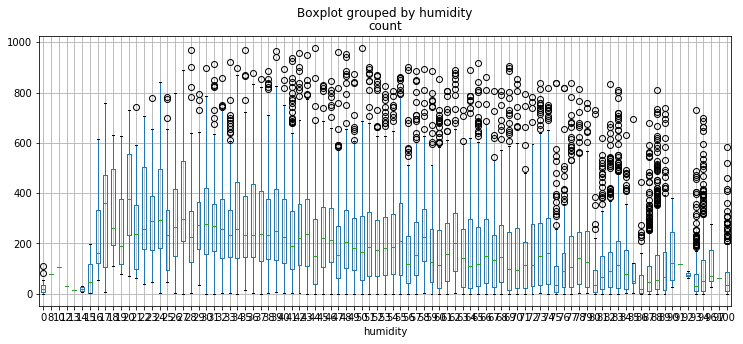

In [70]:
raw_fe.boxplot(column='count', by='humidity', grid=True, figsize=(12,5))
plt.show()

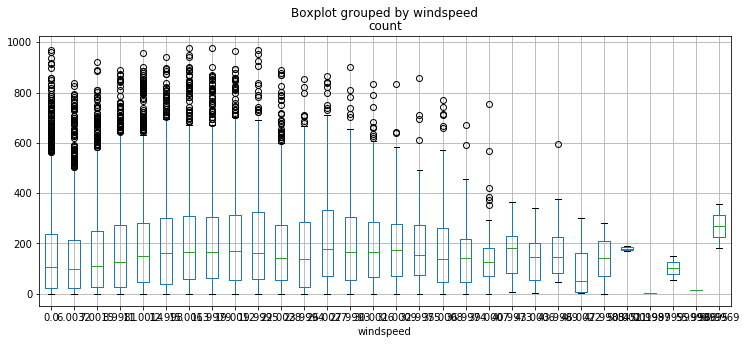

In [71]:
raw_fe.boxplot(column='count', by='windspeed', grid=True, figsize=(12,5))
plt.show()

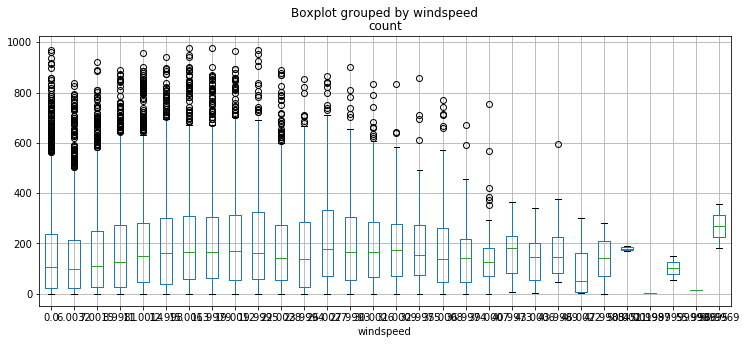

In [72]:
raw_fe.boxplot(column='count', by='windspeed', grid=True, figsize=(12,5))
plt.show()

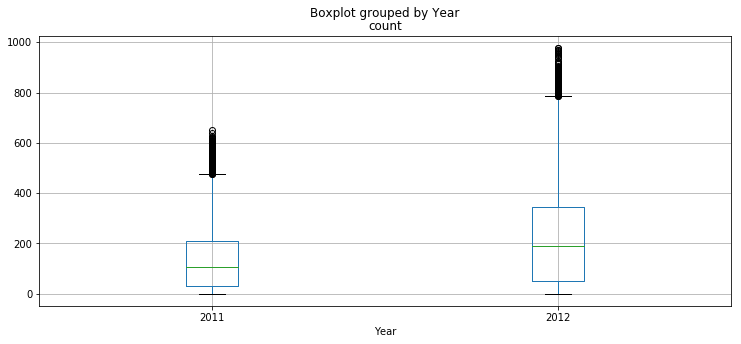

In [73]:
raw_fe.boxplot(column='count', by='Year', grid=True, figsize=(12,5))
plt.show()

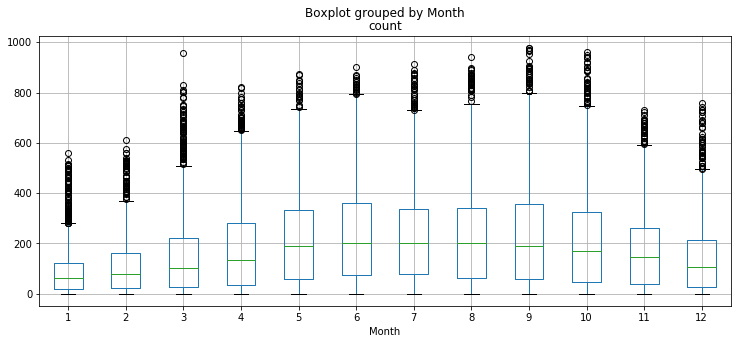

In [74]:
raw_fe.boxplot(column='count', by='Month', grid=True, figsize=(12,5))
plt.show()

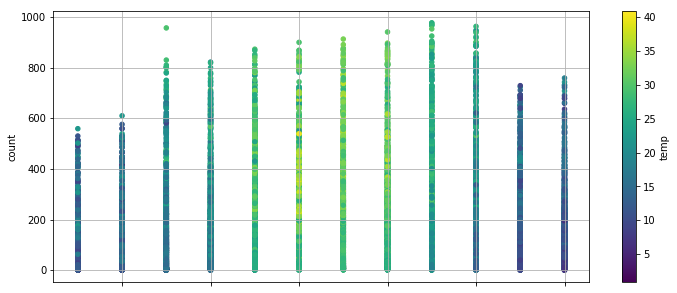

In [75]:
raw_fe.plot.scatter(y='count', x='Month', c='temp', grid=True, figsize=(12,5), colormap='viridis')
plt.show()

In [76]:
# pd.plotting.scatter_matrix(raw_fe, figsize=(18,18), diagonal='kde')
# plt.show()

<img src='Image/Scatter_Matrix.png' width='800'>

In [77]:
rs = np.random.RandomState(0)
df = pd.DataFrame(rs.rand(10, 10))
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')
corr

,0,1,2,3,4,5,6,7,8,9
0,1.00,0.35,0.40,0.46,0.07,-0.23,-0.73,0.48,-0.44,0.02
1,0.35,1.00,-0.28,0.57,-0.29,0.38,-0.36,0.64,0.25,0.19
2,0.40,-0.28,1.00,-0.52,0.15,-0.14,-0.09,0.02,-0.43,-0.38
3,0.46,0.57,-0.52,1.00,-0.23,-0.23,-0.48,0.47,0.28,0.45
4,0.07,-0.29,0.15,-0.23,1.00,-0.10,-0.15,-0.52,-0.61,-0.19
5,-0.23,0.38,-0.14,-0.23,-0.10,1.00,-0.03,0.42,0.21,0.10
6,-0.73,-0.36,-0.09,-0.48,-0.15,-0.03,1.00,-0.49,0.38,-0.35
7,0.48,0.64,0.02,0.47,-0.52,0.42,-0.49,1.00,0.38,0.42
8,-0.44,0.25,-0.43,0.28,-0.61,0.21,0.38,0.38,1.00,0.15
9,0.02,0.19,-0.38,0.45,-0.19,0.10,-0.35,0.42,0.15,1.00


In [78]:
# raw_fe.corr()
# raw_fe.corr().style.background_gradient()
# raw_fe.corr().style.background_gradient().set_precision(2)

In [79]:
raw_fe.corr().style.background_gradient().set_precision(2).set_properties(**{'font-size': '15pt'})

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,count_trend,count_seasonal,count_Day,count_Week,count_diff,Year,Quater_ver2,Month,Day,Hour,DayofWeek,count_lag1,count_lag2,Quater_Dummy_2,Quater_Dummy_3,Quater_Dummy_4,Quater
season,1,-0.019,0.015,-0.015,0.32,0.33,0.15,-0.14,0.12,0.18,0.18,0.41,1.6e-17,0.41,0.47,-0.00024,-0.0018,0.42,0.83,-0.0007,-0.0081,-0.0073,0.18,0.18,-0.2,0.31,0.6,0.86
holiday,-0.019,1,-0.26,-0.004,-0.036,-0.041,-0.0056,0.0097,0.027,-0.052,-0.036,-0.078,-0.0048,-0.073,-0.035,-0.0013,0.0018,0.013,0.0098,-0.0087,0.0097,-0.19,-0.035,-0.036,-0.026,-0.027,0.047,0.023
workingday,0.015,-0.26,1,0.044,0.054,0.053,0.016,-0.016,-0.3,0.13,0.03,0.041,0.0018,0.016,0.019,0.0071,0.0002,-0.0045,-0.0026,0.0091,-0.0041,-0.7,0.026,0.022,0.012,0.009,-0.018,-0.0096
weather,-0.015,-0.004,0.044,1,-0.11,-0.11,0.43,0.049,-0.16,-0.13,-0.15,-0.25,-0.0012,-0.17,-0.072,-0.018,-0.022,-0.02,0.00089,0.01,-0.022,-0.057,-0.14,-0.14,-0.027,-0.067,0.053,-0.00065
temp,0.32,-0.036,0.054,-0.11,1,0.99,-0.074,-0.024,0.46,0.34,0.41,0.6,0.17,0.61,0.62,-0.0023,0.047,0.14,0.21,0.024,0.14,-0.03,0.41,0.4,0.26,0.6,-0.31,0.21
atemp,0.33,-0.041,0.053,-0.11,0.99,1,-0.057,-0.064,0.46,0.34,0.41,0.61,0.16,0.61,0.62,-0.0054,0.046,0.15,0.22,0.018,0.13,-0.032,0.41,0.4,0.27,0.58,-0.29,0.22
humidity,0.15,-0.0056,0.016,0.43,-0.074,-0.057,1,-0.27,-0.35,-0.28,-0.33,-0.09,-0.34,-0.065,0.037,0.0013,-0.085,0.0018,0.16,0.034,-0.27,-0.041,-0.33,-0.31,-0.03,0.064,0.1,0.15
windspeed,-0.14,0.0097,-0.016,0.049,-0.024,-0.064,-0.27,1,0.082,0.072,0.083,-0.16,0.19,-0.14,-0.1,0.0061,-0.013,-0.074,-0.13,0.021,0.14,-0.00035,0.079,0.062,0.044,-0.1,-0.058,-0.13
casual,0.12,0.027,-0.3,-0.16,0.46,0.46,-0.35,0.082,1,0.51,0.7,0.39,0.44,0.39,0.34,0.076,0.14,0.16,0.072,-0.0074,0.3,0.24,0.65,0.58,0.15,0.17,-0.1,0.073
registered,0.18,-0.052,0.13,-0.13,0.34,0.34,-0.28,0.072,0.51,1,0.97,0.4,0.71,0.38,0.36,0.31,0.26,0.28,0.13,-0.0093,0.37,-0.08,0.8,0.53,0.062,0.13,-0.002,0.12


In [80]:
raw_fe.corr().iloc[:,8:11]

,casual,registered,count
season,0.12,0.18,0.18
holiday,0.03,-0.05,-0.04
workingday,-0.30,0.13,0.03
weather,-0.16,-0.13,-0.15
temp,0.46,0.34,0.41
...,...,...,...
count_lag2,0.58,0.53,0.60
Quater_Dummy_2,0.15,0.06,0.09
Quater_Dummy_3,0.17,0.13,0.15
Quater_Dummy_4,-0.10,-0.00,-0.03


In [81]:
raw_fe.corr().loc[:, ['casual', 'registered', 'count']]

,casual,registered,count
season,0.12,0.18,0.18
holiday,0.03,-0.05,-0.04
workingday,-0.30,0.13,0.03
weather,-0.16,-0.13,-0.15
temp,0.46,0.34,0.41
...,...,...,...
count_lag2,0.58,0.53,0.60
Quater_Dummy_2,0.15,0.06,0.09
Quater_Dummy_3,0.17,0.13,0.15
Quater_Dummy_4,-0.10,-0.00,-0.03


In [82]:
raw_fe.corr().loc[:, ['casual', 'registered', 'count']].style.background_gradient().set_precision(2).set_properties(**{'font-size': '15pt'})

,casual,registered,count
season,0.12,0.18,0.18
holiday,0.027,-0.052,-0.036
workingday,-0.3,0.13,0.03
weather,-0.16,-0.13,-0.15
temp,0.46,0.34,0.41
atemp,0.46,0.34,0.41
humidity,-0.35,-0.28,-0.33
windspeed,0.082,0.072,0.083
casual,1,0.51,0.7
registered,0.51,1,0.97


In [83]:
raw_fe.corr().iloc[0:8,8:11].style.background_gradient().set_precision(2).set_properties(**{'font-size': '15pt'})

,casual,registered,count
season,0.12,0.18,0.18
holiday,0.027,-0.052,-0.036
workingday,-0.3,0.13,0.03
weather,-0.16,-0.13,-0.15
temp,0.46,0.34,0.41
atemp,0.46,0.34,0.41
humidity,-0.35,-0.28,-0.33
windspeed,0.082,0.072,0.083


# Data Split: 최종 전처리 및 학습/검증/테스트용 데이터 분리
**1. Import Library**  
**2. Data Loading**  [(Data Source and Description)](https://www.kaggle.com/c/bike-sharing-demand/data)  
**3. Feature Engineering(Rearrange of Data)**  
**4. Data Understanding(Descriptive Statistics and Getting Insight from Features)**  
**5. Data Split: Train/Validate/Test Sets**  

In [84]:
# raw_fe.isnull().sum().unique()

In [85]:
# for x in raw_fe.columns:
#     if x not in Y_colname+X_remove:
#         print(x)

In [86]:
# Confirm of input and output
Y_colname = ['count']
X_remove = ['datetime', 'DateTime', 'temp_group', 'casual', 'registered']
X_colname = [x for x in raw_fe.columns if x not in Y_colname+X_remove]
X_colname

['season',
 'holiday',
 'workingday',
 'weather',
 'temp',
 'atemp',
 'humidity',
 'windspeed',
 'count_trend',
 'count_seasonal',
 'count_Day',
 'count_Week',
 'count_diff',
 'Year',
 'Quater_ver2',
 'Month',
 'Day',
 'Hour',
 'DayofWeek',
 'count_lag1',
 'count_lag2',
 'Quater_Dummy_2',
 'Quater_Dummy_3',
 'Quater_Dummy_4',
 'Quater']

In [87]:
# for a non time-series
# raw_train, raw_test = train_test_split(raw_fe, test_size=0.2, random_state=123)
# print(raw_train.shape, raw_test.shape)
# raw_train
X_train, X_test, Y_train, Y_test = train_test_split(raw_fe[X_colname], raw_fe[Y_colname], test_size=0.2, random_state=123)
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)
X_train

(14035, 25) (14035, 1)
(3509, 25) (3509, 1)


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count_trend,count_seasonal,...,Month,Day,Hour,DayofWeek,count_lag1,count_lag2,Quater_Dummy_2,Quater_Dummy_3,Quater_Dummy_4,Quater
DateTime,,,,,,,,,,,,,,,,,,,,,
2011-10-13 06:00:00,4,0,1,3,22.14,25.76,100,6.00,107.25,-112.33,...,10,13,6,3,17.00,7.00,0,0,1,4
2011-01-16 00:00:00,1,0,0,1,10.66,15.15,56,0.00,54.31,-134.25,...,1,16,0,6,44.00,26.00,0,0,0,1
2012-08-19 13:00:00,3,0,0,3,26.24,28.79,83,9.00,180.31,65.21,...,8,19,13,6,298.00,272.00,0,1,0,3
2012-07-10 18:00:00,3,0,1,3,28.70,33.34,74,15.00,260.67,236.38,...,7,10,18,1,872.00,435.00,0,1,0,3
2011-05-18 09:00:00,2,0,1,3,22.96,26.52,83,17.00,161.56,30.51,...,5,18,9,2,453.00,274.00,1,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011-01-05 00:00:00,1,0,1,1,8.20,12.88,64,0.00,66.48,-134.25,...,1,5,0,2,11.00,35.00,0,0,0,1
2012-07-13 19:00:00,3,0,1,1,30.34,33.34,51,11.00,311.67,122.70,...,7,13,19,4,631.00,835.00,0,1,0,3
2011-11-20 11:00:00,4,0,0,2,20.50,24.24,63,7.00,148.02,19.32,...,11,20,11,6,229.00,138.00,0,0,1,4


In [88]:
# for a time-series
raw_train = raw_fe.loc[raw_fe.index < '2012-07-01',:]
raw_test = raw_fe.loc[raw_fe.index >= '2012-07-01',:]
print(raw_train.shape, raw_test.shape)

(13128, 31) (4416, 31)


In [89]:
Y_train = raw_train[Y_colname]
X_train = raw_train[X_colname]
Y_test = raw_test[Y_colname]
X_test = raw_test[X_colname]
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(13128, 25) (13128, 1)
(4416, 25) (4416, 1)


## Code Summary

In [90]:
### Functionalize
### Data split of cross sectional
def datasplit_cs(raw, Y_colname, X_colname, test_size, random_seed=123):
    X_train, X_test, Y_train, Y_test = train_test_split(raw[X_colname], raw[Y_colname], test_size=test_size, random_state=random_seed)
    print('X_train:', X_train.shape, 'Y_train:', Y_train.shape)
    print('X_test:', X_test.shape, 'Y_test:', Y_test.shape)
    return X_train, X_test, Y_train, Y_test
# X_train, X_test, Y_train, Y_test = datasplit_cs(raw_fe, Y_colname, X_colname, 0.2)


### Data split of time series
def datasplit_ts(raw, Y_colname, X_colname, criteria):
    raw_train = raw.loc[raw.index < criteria,:]
    raw_test = raw.loc[raw.index >= criteria,:]
    Y_train = raw_train[Y_colname]
    X_train = raw_train[X_colname]
    Y_test = raw_test[Y_colname]
    X_test = raw_test[X_colname]
    print('Train_size:', raw_train.shape, 'Test_size:', raw_test.shape)
    print('X_train:', X_train.shape, 'Y_train:', Y_train.shape)
    print('X_test:', X_test.shape, 'Y_test:', Y_test.shape)
    return X_train, X_test, Y_train, Y_test
# X_train, X_test, Y_train, Y_test = datasplit_ts(raw_fe, Y_colname, X_colname, '2012-07-01')

In [91]:
# Confirm of input and output
Y_colname = ['count']
X_remove = ['datetime', 'DateTime', 'temp_group', 'casual', 'registered']
X_colname = [x for x in raw_fe.columns if x not in Y_colname+X_remove]
X_train, X_test, Y_train, Y_test = datasplit_ts(raw_fe, Y_colname, X_colname, '2012-07-01')

Train_size: (13128, 31) Test_size: (4416, 31)
X_train: (13128, 25) Y_train: (13128, 1)
X_test: (4416, 25) Y_test: (4416, 1)


# Applying Base Model: Y예측을 위한 Base분석 실행
**1. Import Library**  
**2. Data Loading**  [(Data Source and Description)](https://www.kaggle.com/c/bike-sharing-demand/data)  
**3. Feature Engineering(Rearrange of Data)**  
**4. Data Understanding(Descriptive Statistics and Getting Insight from Features)**  
**5. Data Split: Train/Validate/Test Sets**  
**6. Applying Base Model**  

In [92]:
X_train.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
season,"13,128.00",2.20,1.05,1.00,1.00,2.00,3.00,4.00
holiday,"13,128.00",0.03,0.17,0.00,0.00,0.00,0.00,1.00
workingday,"13,128.00",0.68,0.46,0.00,0.00,1.00,1.00,1.00
weather,"13,128.00",1.43,0.66,1.00,1.00,1.00,2.00,4.00
temp,"13,128.00",19.66,7.87,0.82,13.12,19.68,26.24,40.18
...,...,...,...,...,...,...,...,...
count_lag2,"13,128.00",166.18,160.77,1.00,33.00,123.00,244.00,957.00
Quater_Dummy_2,"13,128.00",0.33,0.47,0.00,0.00,0.00,1.00,1.00
Quater_Dummy_3,"13,128.00",0.17,0.37,0.00,0.00,0.00,0.00,1.00
Quater_Dummy_4,"13,128.00",0.17,0.37,0.00,0.00,0.00,0.00,1.00


In [93]:
# LinearRegression (using statsmodels)
fit_reg1 = sm.OLS(Y_train, X_train).fit()
fit_reg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.362e+08
Date:                Wed, 13 Mar 2019   Prob (F-statistic):               0.00
Time:                        22:32:34   Log-Likelihood:                 1906.2
No. Observations:               13128   AIC:                            -3764.
Df Residuals:                   13104   BIC:                            -3585.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
season            -0.0005      0.004     -0.129      0.897      -0.009       0.008
holiday            0.0083      0.014      0.612      0.540      -0.018       0.035
workingday         0.0079      0.007      1.184      0.236      -0.005       0.021
weather            0.0042      0.003      1.232      0.218      -0.003       0.011
temp               0.0022      0.002      1.075      0.282      -0.002       0.006
atemp             -0.0025      0.002     -1.347      0.178      -0.006       0.001
humidity          -0.0001      0.000     -0.845      0.398      -0.000       0.000
windspeed          0.0003      0.000      1.062      0.288      -0.000       0.001
count_trend     9.161e-05   8.57e-05      1.069      0.285   -7.64e-05       0.000
count_seasonal  1.984e-05   2.56e-05      0.775      0.438   -3.03e-05       7e-05
count_Day       4.177e-05   8.36e-05      0.500      0.617      -0.000       0.000
count_Week     -4.345e-05   9.61e-05     -0.452      0.651      -0.000       0.000
count_diff         1.0000    2.9e-05   3.45e+04      0.000       1.000       1.000
Year           -1.387e-05   7.63e-06     -1.818      0.069   -2.88e-05    1.09e-06
Quater_ver2        0.0004      0.002      0.180      0.857      -0.004       0.005
Month              0.0026      0.002      1.051      0.293      -0.002       0.007
Day                0.0004      0.000      1.728      0.084   -4.91e-05       0.001
Hour               0.0006      0.000      1.538      0.124      -0.000       0.001
DayofWeek          0.0003      0.002      0.224      0.823      -0.003       0.003
count_lag1         1.0000    2.7e-05    3.7e+04      0.000       1.000       1.000
count_lag2     -1.926e-05   2.59e-05     -0.744      0.457      -7e-05    3.15e-05
Quater_Dummy_2     0.0022      0.006      0.391      0.696      -0.009       0.013
Quater_Dummy_3     0.0027      0.005      0.505      0.614      -0.008       0.013
Quater_Dummy_4    -0.0036      0.005     -0.707      0.480      -0.014       0.006
Quater            -0.0032      0.008     -0.416      0.677      -0.018       0.012
==============================================================================
Omnibus:                    54426.083   Durbin-Watson:                   1.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):      93552024983.786
Skew:                        -114.255   Prob(JB):                         0.00
Kurtosis:                   13078.751   Cond. No.                     2.48e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.96e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [94]:
# display(fit_reg1.predict(X_train))
# display(fit_reg1.predict(X_test))
pred_tr_reg1 = fit_reg1.predict(X_train).values
pred_te_reg1 = fit_reg1.predict(X_test).values

## Code Summary

In [95]:
# LinearRegression (using statsmodels)
fit_reg1 = sm.OLS(Y_train, X_train).fit()
pred_tr_reg1 = fit_reg1.predict(X_train).values
pred_te_reg1 = fit_reg1.predict(X_test).values

# Evaluation: 분석 성능 확인/평가하기
**1. Import Library**  
**2. Data Loading**  [(Data Source and Description)](https://www.kaggle.com/c/bike-sharing-demand/data)  
**3. Feature Engineering(Rearrange of Data)**  
**4. Data Understanding(Descriptive Statistics and Getting Insight from Features)**  
**5. Data Split: Train/Validate/Test Sets**  
**6. Applying Base Model**  
**7. Evaluation**  

In [96]:
# pd.concat([Y_train, pd.DataFrame(pred_tr_reg1, index=Y_train.index, columns=['prediction'])], axis=1)

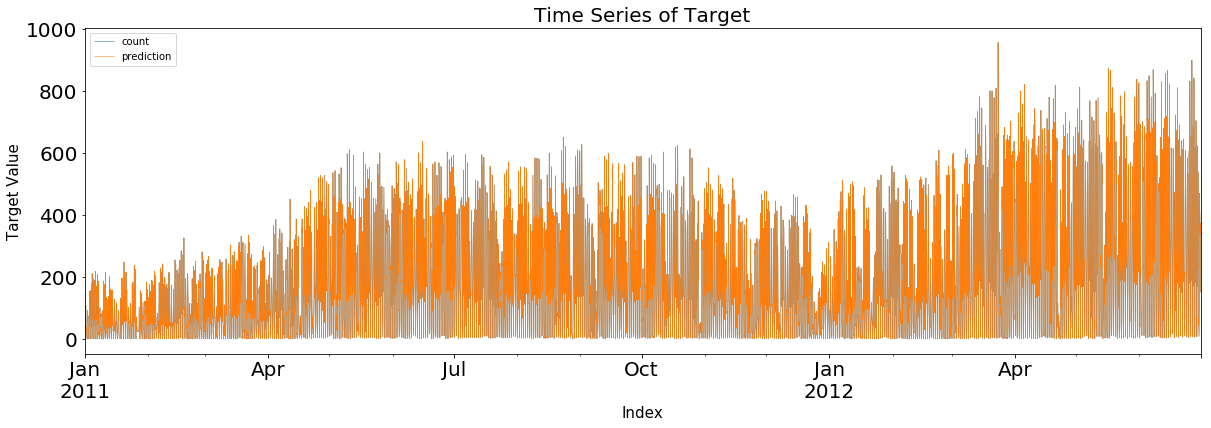

,MAE,MSE,MAPE
Score,0.01,0.04,0.06


In [97]:
pd.concat([Y_train, pd.DataFrame(pred_tr_reg1, index=Y_train.index, columns=['prediction'])], axis=1).plot(kind='line', figsize=(20,6),
                                                                                                               xlim=(Y_train.index.min(),Y_train.index.max()),
                                                                                                               linewidth=0.5, fontsize=20)
plt.title('Time Series of Target', fontsize=20)
plt.xlabel('Index', fontsize=15)
plt.ylabel('Target Value', fontsize=15)
plt.show()

MAE = abs(Y_train.values.flatten() - pred_tr_reg1).mean()
MSE = ((Y_train.values.flatten() - pred_tr_reg1)**2).mean()
MAPE = (abs(Y_train.values.flatten() - pred_tr_reg1)/Y_train.values.flatten()*100).mean()

display(pd.DataFrame([MAE, MSE, MAPE], index=['MAE', 'MSE', 'MAPE'], columns=['Score']).T)

## Code Summary

In [98]:
### Functionalize
### Evaluation of 1 pair of set
def evaluation(Y_real, Y_pred, graph_on=False):
    loss_length = len(Y_real.values.flatten()) - len(Y_pred)
    if loss_length != 0:
        Y_real = Y_real[loss_length:]
    if graph_on == True:
        pd.concat([Y_real, pd.DataFrame(Y_pred, index=Y_real.index, columns=['prediction'])], axis=1).plot(kind='line', figsize=(20,6),
                                                                                                           xlim=(Y_real.index.min(),Y_real.index.max()),
                                                                                                           linewidth=3, fontsize=20)
        plt.title('Time Series of Target', fontsize=20)
        plt.xlabel('Index', fontsize=15)
        plt.ylabel('Target Value', fontsize=15)
    MAE = abs(Y_real.values.flatten() - Y_pred).mean()
    MSE = ((Y_real.values.flatten() - Y_pred)**2).mean()
    MAPE = (abs(Y_real.values.flatten() - Y_pred)/Y_real.values.flatten()*100).mean()
    Score = pd.DataFrame([MAE, MSE, MAPE], index=['MAE', 'MSE', 'MAPE'], columns=['Score']).T
    Residual = pd.DataFrame(Y_real.values.flatten() - Y_pred, index=Y_real.index, columns=['Error'])
    return Score, Residual
# Score_tr, Residual_tr = evaluation(Y_train, pred_tr_reg1, graph_on=True)


### Evaluation of train/test pairs
def evaluation_trte(Y_real_tr, Y_pred_tr, Y_real_te, Y_pred_te, graph_on=False):
    Score_tr, Residual_tr = evaluation(Y_real_tr, Y_pred_tr, graph_on=graph_on)
    Score_te, Residual_te = evaluation(Y_real_te, Y_pred_te, graph_on=graph_on)
    Score_trte = pd.concat([Score_tr, Score_te], axis=0)
    Score_trte.index = ['Train', 'Test']
    return Score_trte, Residual_tr, Residual_te
# Score_reg1, Resid_tr_reg1, Resid_te_reg1 = evaluation_trte(Y_train, pred_tr_reg1, Y_test, pred_te_reg1, graph_on=True)

,MAE,MSE,MAPE
Train,0.01,0.04,0.06
Test,0.01,0.00,0.03


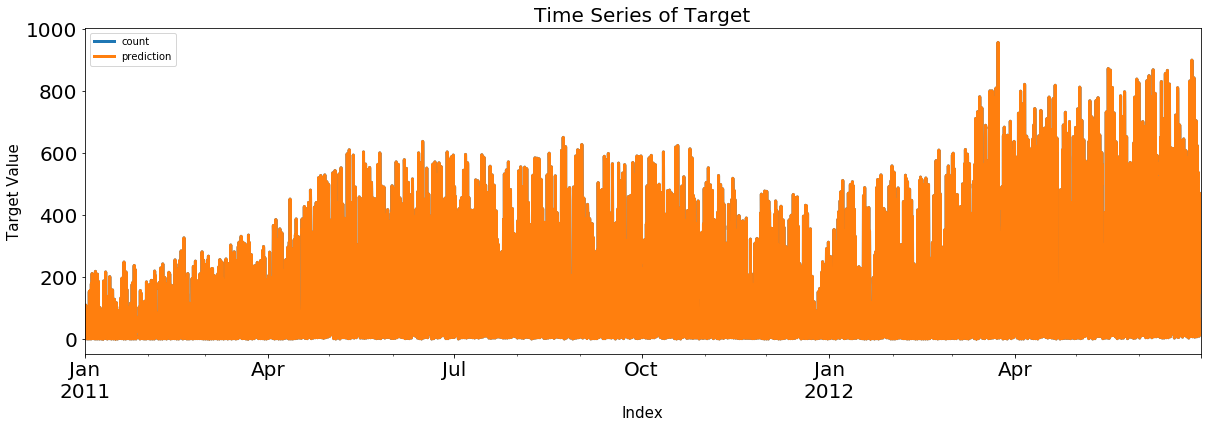

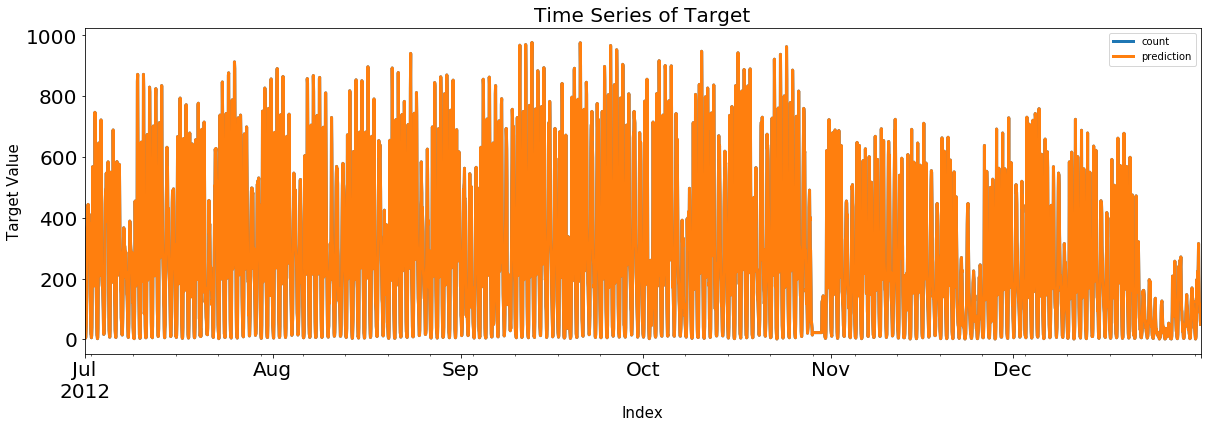

In [99]:
Score_reg1, Resid_tr_reg1, Resid_te_reg1 = evaluation_trte(Y_train, pred_tr_reg1, Y_test, pred_te_reg1, graph_on=True)
Score_reg1

# Error Analysis: 분석모형이 데이터패턴을 모두 추출하여 분석을 종료해도 되는지 판단하기
**1. Import Library**  
**2. Data Loading**  [(Data Source and Description)](https://www.kaggle.com/c/bike-sharing-demand/data)  
**3. Feature Engineering(Rearrange of Data)**  
**4. Data Understanding(Descriptive Statistics and Getting Insight from Features)**  
**5. Data Split: Train/Validate/Test Sets**  
**6. Applying Base Model**  
**7. Evaluation**  
**8. Error Analysis**  

In [100]:
# pd.Series(sm.tsa.stattools.adfuller(Resid_tr_reg1['Error'])
# sm.tsa.stattools.adfuller(Resid_tr_reg1['Error'])
# pd.Series(sm.tsa.stattools.adfuller(Resid_tr_reg1['Error'])[0:4], index=['Test Statistics', 'p-value', 'Used Lag', 'Used Observations'])

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


,Stationarity,Normality,Autocorr(lag1),Autocorr(lag5),Autocorr(lag10),Autocorr(lag50),Heteroscedasticity
Test Statistics,-9.98,0.01,0.00,0.01,0.03,0.10,0.00
p-value,0.00,0.00,0.98,1.00,1.00,1.00,0.00
Alternative,nan,nan,nan,nan,nan,nan,two-sided
Used Lag,41.00,nan,nan,nan,nan,nan,NaN
Used Observations,"13,086.00",nan,nan,nan,nan,nan,NaN
Critical Value(1%),-3.43,nan,nan,nan,nan,nan,NaN
Critical Value(5%),-2.86,nan,nan,nan,nan,nan,NaN
Critical Value(10%),-2.57,nan,nan,nan,nan,nan,NaN
Maximum Information Criteria,"-106,845.57",nan,nan,nan,nan,nan,NaN


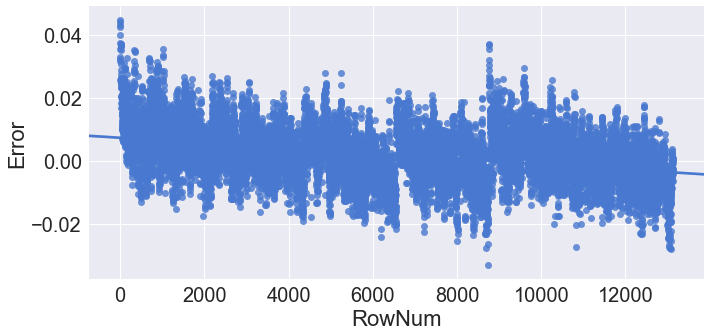

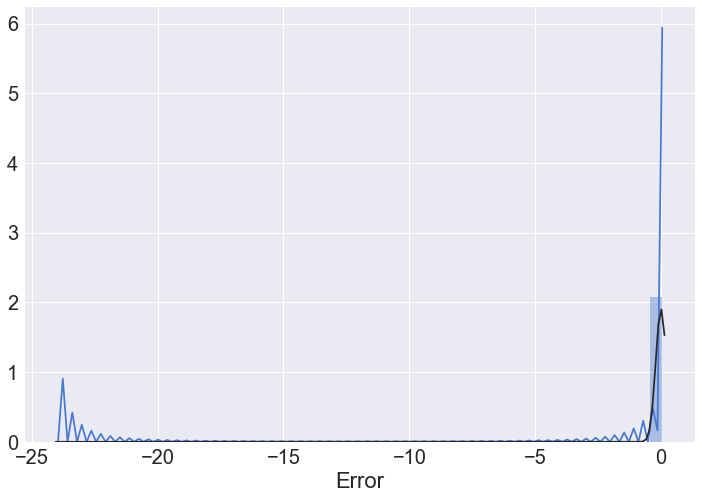

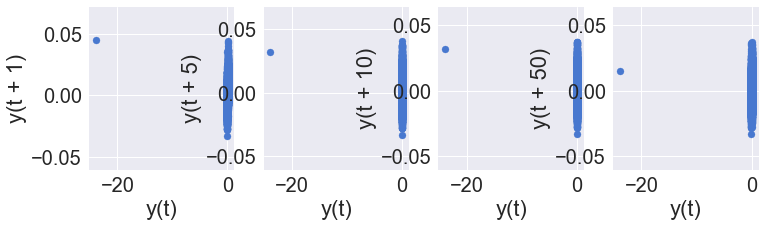

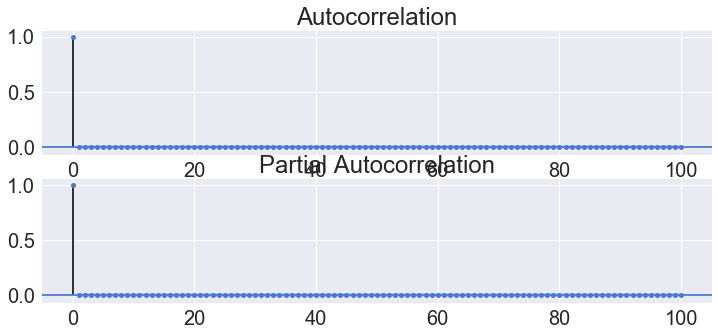

In [102]:
# Error Analysis(Plot)
Resid_tr_reg1['RowNum'] = Resid_tr_reg1.reset_index().index

# Stationarity(Trend) Analysis
sns.set(palette="muted", color_codes=True, font_scale=2)
sns.lmplot(x='RowNum', y='Error', data=Resid_tr_reg1.iloc[1:],
           fit_reg='True', size=5.2, aspect=2, ci=99, sharey=True)

# Normal Distribution Analysis
figure, axes = plt.subplots(figsize=(12,8))
sns.distplot(Resid_tr_reg1['Error'], norm_hist='True', fit=stats.norm)

# Lag Analysis
length = int(len(Resid_tr_reg1['Error'])/10)
figure, axes = plt.subplots(1, 4, figsize=(12,3))
pd.plotting.lag_plot(Resid_tr_reg1['Error'], lag=1, ax=axes[0])
pd.plotting.lag_plot(Resid_tr_reg1['Error'], lag=5, ax=axes[1])
pd.plotting.lag_plot(Resid_tr_reg1['Error'], lag=10, ax=axes[2])
pd.plotting.lag_plot(Resid_tr_reg1['Error'], lag=50, ax=axes[3])

# Autocorrelation Analysis
figure, axes = plt.subplots(2,1,figsize=(12,5))
figure = sm.graphics.tsa.plot_acf(Resid_tr_reg1['Error'], lags=100, use_vlines=True, ax=axes[0])
figure = sm.graphics.tsa.plot_pacf(Resid_tr_reg1['Error'], lags=100, use_vlines=True, ax=axes[1])

# Error Analysis(Statistics)
# Checking Stationarity
# Null Hypothesis: The Time-series is non-stationalry
Stationarity = pd.Series(sm.tsa.stattools.adfuller(Resid_tr_reg1['Error'])[0:4], index=['Test Statistics', 'p-value', 'Used Lag', 'Used Observations'])
for key, value in sm.tsa.stattools.adfuller(Resid_tr_reg1['Error'])[4].items():
    Stationarity['Critical Value(%s)'%key] = value
Stationarity['Maximum Information Criteria'] = sm.tsa.stattools.adfuller(Resid_tr_reg1['Error'])[5]
Stationarity = pd.DataFrame(Stationarity, columns=['Stationarity'])

# Checking of Normality
# Null Hypothesis: The residuals are normally distributed
Normality = pd.DataFrame([stats.shapiro(Resid_tr_reg1['Error'])], index=['Normality'], columns=['Test Statistics', 'p-value']).T

# Checking for Autocorrelation
# Null Hypothesis: Autocorrelation is absent
Autocorrelation = pd.concat([pd.DataFrame(sm.stats.diagnostic.acorr_ljungbox(Resid_tr_reg1['Error'], lags=[1,5,10,50])[0], columns=['Test Statistics']),
                             pd.DataFrame(sm.stats.diagnostic.acorr_ljungbox(Resid_tr_reg1['Error'], lags=[1,5,10,50])[1], columns=['p-value'])], axis=1).T
Autocorrelation.columns = ['Autocorr(lag1)', 'Autocorr(lag5)', 'Autocorr(lag10)', 'Autocorr(lag50)']

# Checking Heteroscedasticity
# Null Hypothesis: Error terms are homoscedastic
Heteroscedasticity = pd.DataFrame([sm.stats.diagnostic.het_goldfeldquandt(Resid_tr_reg1['Error'], X_train.values, alternative='two-sided')],
                                  index=['Heteroscedasticity'], columns=['Test Statistics', 'p-value', 'Alternative']).T
Error_Analysis = pd.concat([Stationarity, Normality, Autocorrelation, Heteroscedasticity], join='outer', axis=1)
Error_Analysis = Error_Analysis.loc[['Test Statistics', 'p-value', 'Alternative', 'Used Lag', 'Used Observations',
                                     'Critical Value(1%)', 'Critical Value(5%)', 'Critical Value(10%)',
                                     'Maximum Information Criteria'],:]
Error_Analysis

## Code Summary

In [104]:
### Functionalize
### Error analysis
def error_analysis(Y_Data, Target_name, X_Data, graph_on=False):
    for x in Target_name:
        Target_name = x
    X_Data = X_Data.loc[Y_Data.index]

    if graph_on == True:
        ##### Error Analysis(Plot)
        Y_Data['RowNum'] = Y_Data.reset_index().index

        # Stationarity(Trend) Analysis
        sns.set(palette="muted", color_codes=True, font_scale=2)
        sns.lmplot(x='RowNum', y=Target_name, data=Y_Data, fit_reg='True', size=5.2, aspect=2, ci=99, sharey=True)
        del Y_Data['RowNum']

        # Normal Distribution Analysis
        figure, axes = plt.subplots(figsize=(12,8))
        sns.distplot(Y_Data[Target_name], norm_hist='True', fit=stats.norm, ax=axes)

        # Lag Analysis
        length = int(len(Y_Data[Target_name])/10)
        figure, axes = plt.subplots(1, 4, figsize=(12,3))
        pd.plotting.lag_plot(Y_Data[Target_name], lag=1, ax=axes[0])
        pd.plotting.lag_plot(Y_Data[Target_name], lag=5, ax=axes[1])
        pd.plotting.lag_plot(Y_Data[Target_name], lag=10, ax=axes[2])
        pd.plotting.lag_plot(Y_Data[Target_name], lag=50, ax=axes[3])

        # Autocorrelation Analysis
        figure, axes = plt.subplots(2,1,figsize=(12,5))
        sm.graphics.tsa.plot_acf(Y_Data[Target_name], lags=100, use_vlines=True, ax=axes[0])
        sm.graphics.tsa.plot_pacf(Y_Data[Target_name], lags=100, use_vlines=True, ax=axes[1])      

    ##### Error Analysis(Statistics)
    # Checking Stationarity
    # Null Hypothesis: The Time-series is non-stationalry
    Stationarity = pd.Series(sm.tsa.stattools.adfuller(Y_Data[Target_name])[0:4],
                             index=['Test Statistics', 'p-value', 'Used Lag', 'Used Observations'])
    for key, value in sm.tsa.stattools.adfuller(Y_Data[Target_name])[4].items():
        Stationarity['Critical Value(%s)'%key] = value
        Stationarity['Maximum Information Criteria'] = sm.tsa.stattools.adfuller(Y_Data[Target_name])[5]
        Stationarity = pd.DataFrame(Stationarity, columns=['Stationarity'])

    # Checking of Normality
    # Null Hypothesis: The residuals are normally distributed
    Normality = pd.DataFrame([stats.shapiro(Y_Data[Target_name])],
                             index=['Normality'], columns=['Test Statistics', 'p-value']).T

    # Checking for Autocorrelation
    # Null Hypothesis: Autocorrelation is absent
    Autocorrelation = pd.concat([pd.DataFrame(sm.stats.diagnostic.acorr_ljungbox(Y_Data[Target_name], lags=[1,5,10,50])[0], columns=['Test Statistics']),
                                 pd.DataFrame(sm.stats.diagnostic.acorr_ljungbox(Y_Data[Target_name], lags=[1,5,10,50])[1], columns=['p-value'])], axis=1).T
    Autocorrelation.columns = ['Autocorr(lag1)', 'Autocorr(lag5)', 'Autocorr(lag10)', 'Autocorr(lag50)']

    # Checking Heteroscedasticity
    # Null Hypothesis: Error terms are homoscedastic
    Heteroscedasticity = pd.DataFrame([sm.stats.diagnostic.het_goldfeldquandt(Y_Data[Target_name], X_Data.values, alternative='two-sided')],
                                      index=['Heteroscedasticity'], columns=['Test Statistics', 'p-value', 'Alternative']).T
    Score = pd.concat([Stationarity, Normality, Autocorrelation, Heteroscedasticity], join='outer', axis=1)
    Score = Score.loc[['Test Statistics', 'p-value', 'Alternative', 'Used Lag', 'Used Observations',
                       'Critical Value(1%)', 'Critical Value(5%)', 'Critical Value(10%)', 'Maximum Information Criteria'],:]
    return Score
# error_analysis(Resid_tr_reg1[1:], ['Error'], X_train, graph_on=True)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


,Stationarity,Normality,Autocorr(lag1),Autocorr(lag5),Autocorr(lag10),Autocorr(lag50),Heteroscedasticity
Test Statistics,-9.98,0.01,0.00,0.01,0.03,0.10,0.00
p-value,0.00,0.00,0.98,1.00,1.00,1.00,0.00
Alternative,nan,nan,nan,nan,nan,nan,two-sided
Used Lag,41.00,nan,nan,nan,nan,nan,NaN
Used Observations,"13,086.00",nan,nan,nan,nan,nan,NaN
Critical Value(1%),-3.43,nan,nan,nan,nan,nan,NaN
Critical Value(5%),nan,nan,nan,nan,nan,nan,NaN
Critical Value(10%),nan,nan,nan,nan,nan,nan,NaN
Maximum Information Criteria,"-106,845.57",nan,nan,nan,nan,nan,NaN


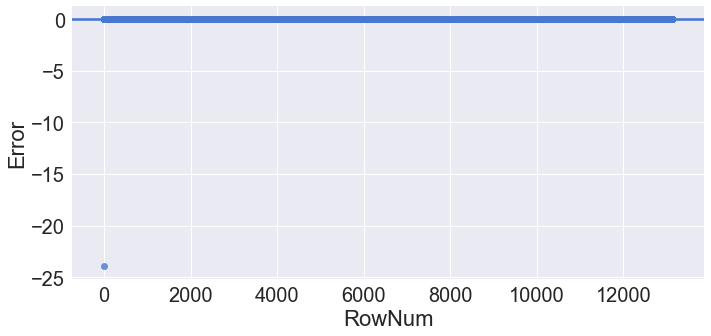

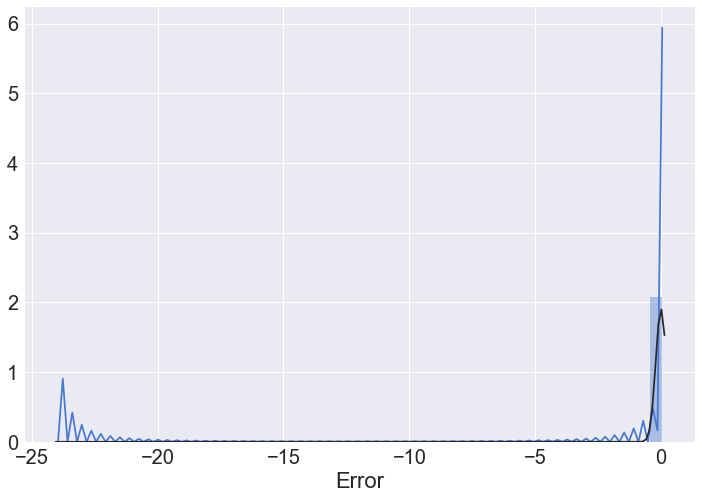

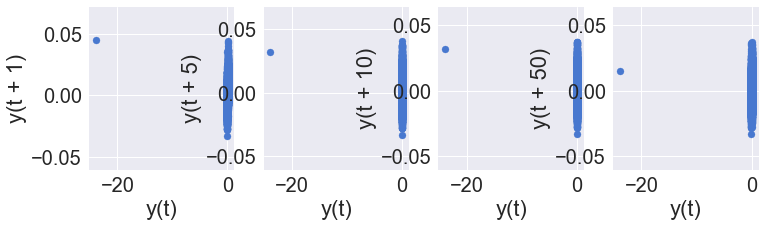

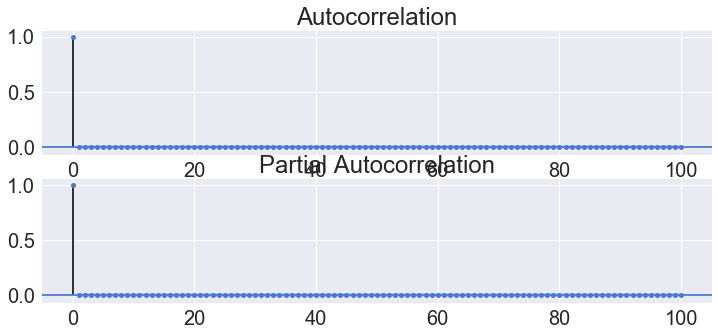

In [105]:
error_analysis(Resid_tr_reg1, ['Error'], X_train, graph_on=True)

# Summary: insufficient for me
**1) 데이터 핸들링**  

**2) 단계이해**  
>**1. Import Library**  
**2. Data Loading**  [(Data Source and Description)](https://www.kaggle.com/c/bike-sharing-demand/data)  
**3. Feature Engineering(Rearrange of Data)**  
**4. Data Understanding(Descriptive Statistics and Getting Insight from Features)**  
**5. Data Split: Train/Validate/Test Sets**  
**6. Applying Base Model**  
**7. Evaluation**  
**8. Error Analysis** 

**3) 결과 해석**  

## Code Summary (Raw Data)

Train_size: (13128, 12) Test_size: (4416, 12)
X_train: (13128, 8) Y_train: (13128, 1)
X_test: (4416, 8) Y_test: (4416, 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.638
Model:                            OLS   Adj. R-squared:                  0.638
Method:                 Least Squares   F-statistic:                     2889.
Date:                Wed, 13 Mar 2019   Prob (F-statistic):               0.00
Time:                        22:34:10   Log-Likelihood:                -83421.
No. Observations:               13128   AIC:                         1.669e+05
Df Residuals:                   13120   BIC:                         1.669e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
season         3.3659      1.286      2.618      0.009       0.846       5.886
holiday       -6.2896      7.466     -0.842      0.400     -20.924       8.345
workingday    10.3553      2.641      3.921      0.000       5.178      15.533
weather        7.1906      2.093      3.436      0.001       3.089      11.292
temp          -7.8544      1.222     -6.429      0.000     -10.249      -5.460
atemp         16.0695      1.095     14.676      0.000      13.923      18.216
humidity      -1.7353      0.063    -27.356      0.000      -1.860      -1.611
windspeed      2.2749      0.136     16.745      0.000       2.009       2.541
==============================================================================
Omnibus:                     2168.771   Durbin-Watson:                   0.419
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3942.747
Skew:                           1.050   Prob(JB):                         0.00
Kurtosis:                       4.672   Cond. No.                         450.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

,MAE,MSE,MAPE
Train,103.09,"19,360.42",458.48
Test,150.03,"43,410.27",316.61


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


,Stationarity,Normality,Autocorr(lag1),Autocorr(lag5),Autocorr(lag10),Autocorr(lag50),Heteroscedasticity
Test Statistics,-9.25,0.94,"8,204.84","12,494.43","13,138.03","48,485.56",1.76
p-value,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Alternative,nan,nan,nan,nan,nan,nan,two-sided
Used Lag,40.00,nan,nan,nan,nan,nan,NaN
Used Observations,"13,087.00",nan,nan,nan,nan,nan,NaN
Critical Value(1%),-3.43,nan,nan,nan,nan,nan,NaN
Critical Value(5%),nan,nan,nan,nan,nan,nan,NaN
Critical Value(10%),nan,nan,nan,nan,nan,nan,NaN
Maximum Information Criteria,"143,252.82",nan,nan,nan,nan,nan,NaN


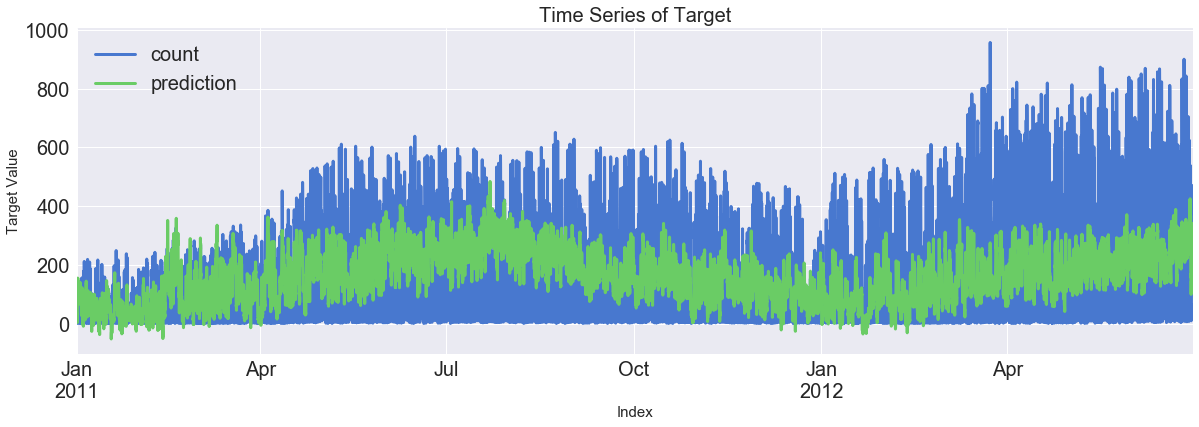

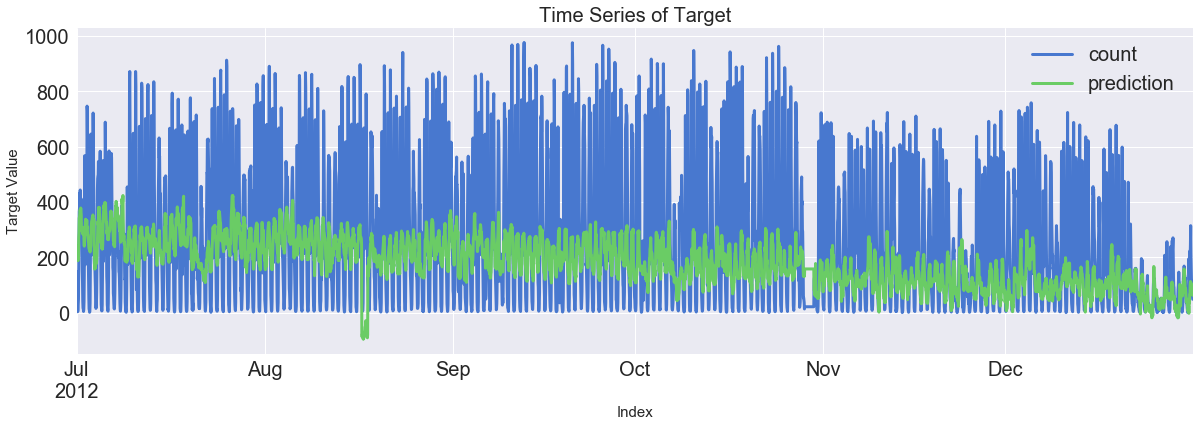

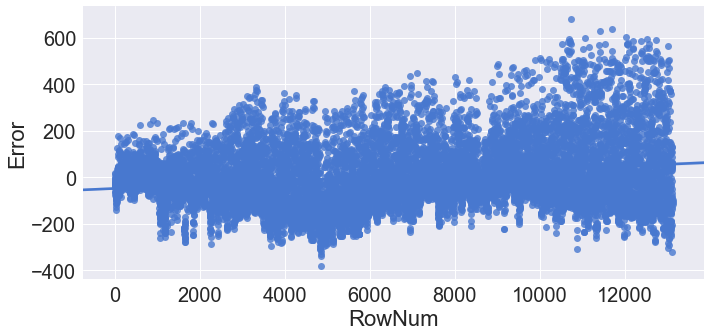

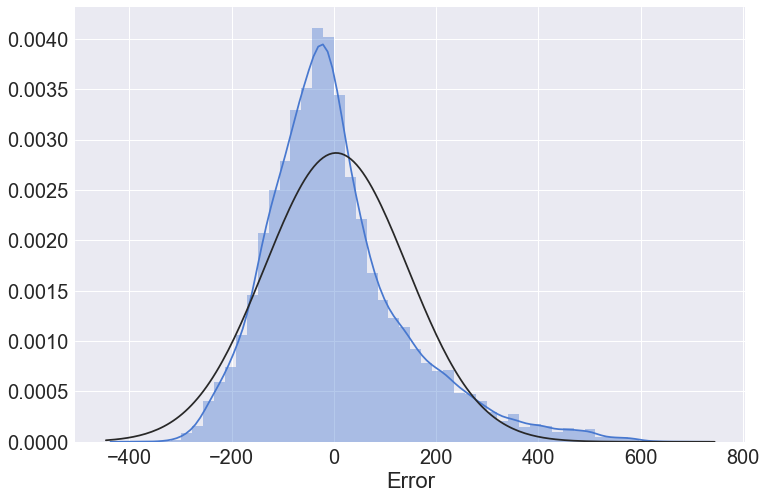

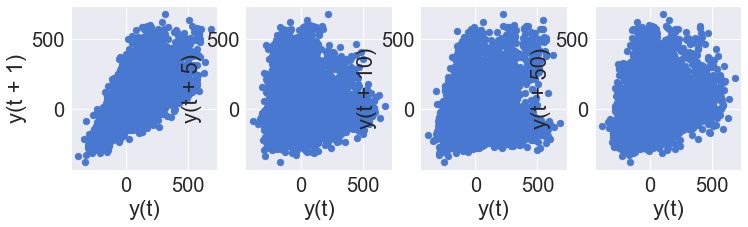

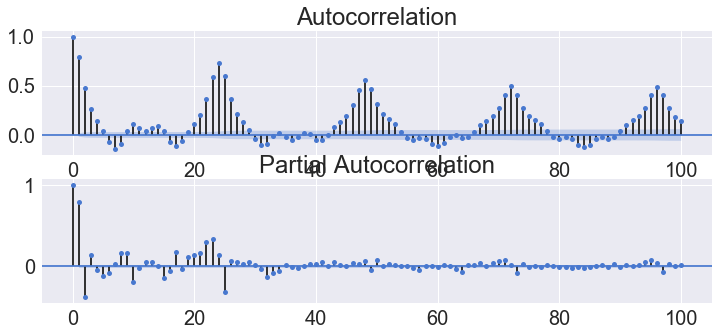

In [106]:
# Data Loading
# location = 'https://raw.githubusercontent.com/cheonbi/DataScience/master/Data/Bike_Sharing_Demand_Full.csv'
location = '../Data/Bike_Sharing_Demand_Full.csv'
raw_all = pd.read_csv(location)

# Feature Engineering
raw_rd = non_feature_engineering(raw_all)

# Data Split
# Confirm of input and output
Y_colname = ['count']
X_remove = ['datetime', 'DateTime', 'temp_group', 'casual', 'registered']
X_colname = [x for x in raw_rd.columns if x not in Y_colname+X_remove]
X_train_rd, X_test_rd, Y_train_rd, Y_test_rd = datasplit_ts(raw_rd, Y_colname, X_colname, '2012-07-01')

# Applying Base Model
fit_reg1_rd = sm.OLS(Y_train_rd, X_train_rd).fit()
display(fit_reg1_rd.summary())
pred_tr_reg1_rd = fit_reg1_rd.predict(X_train_rd).values
pred_te_reg1_rd = fit_reg1_rd.predict(X_test_rd).values

# Evaluation
Score_reg1_rd, Resid_tr_reg1_rd, Resid_te_reg1_rd = evaluation_trte(Y_train_rd, pred_tr_reg1_rd, 
                                                                Y_test_rd, pred_te_reg1_rd, graph_on=True)
display(Score_reg1_rd)

# Error Analysis
error_analysis(Resid_tr_reg1_rd, ['Error'], X_train_rd, graph_on=True)

## Code Summary (Feature Engineering Data)

Train_size: (13128, 29) Test_size: (4416, 29)
X_train: (13128, 24) Y_train: (13128, 1)
X_test: (4416, 24) Y_test: (4416, 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.362e+08
Date:                Wed, 13 Mar 2019   Prob (F-statistic):               0.00
Time:                        22:34:17   Log-Likelihood:                 1906.2
No. Observations:               13128   AIC:                            -3764.
Df Residuals:                   13104   BIC:                            -3585.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
season            -0.0005      0.004     -0.129      0.897      -0.009       0.008
holiday            0.0083      0.014      0.612      0.540      -0.018       0.035
workingday         0.0079      0.007      1.184      0.236      -0.005       0.021
weather            0.0042      0.003      1.232      0.218      -0.003       0.011
temp               0.0022      0.002      1.075      0.282      -0.002       0.006
atemp             -0.0025      0.002     -1.347      0.178      -0.006       0.001
humidity          -0.0001      0.000     -0.845      0.398      -0.000       0.000
windspeed          0.0003      0.000      1.062      0.288      -0.000       0.001
count_trend     9.161e-05   8.57e-05      1.069      0.285   -7.64e-05       0.000
count_seasonal  1.984e-05   2.56e-05      0.775      0.438   -3.03e-05       7e-05
count_Day       4.177e-05   8.36e-05      0.500      0.617      -0.000       0.000
count_Week     -4.345e-05   9.61e-05     -0.452      0.651      -0.000       0.000
count_diff         1.0000    2.9e-05   3.45e+04      0.000       1.000       1.000
Year           -1.547e-05   7.97e-06     -1.939      0.052   -3.11e-05    1.66e-07
Quater_ver2        0.0004      0.002      0.180      0.857      -0.004       0.005
Month              0.0026      0.002      1.051      0.293      -0.002       0.007
Day                0.0004      0.000      1.728      0.084   -4.91e-05       0.001
Hour               0.0006      0.000      1.538      0.124      -0.000       0.001
DayofWeek          0.0003      0.002      0.224      0.823      -0.003       0.003
count_lag1         1.0000    2.7e-05    3.7e+04      0.000       1.000       1.000
count_lag2     -1.926e-05   2.59e-05     -0.744      0.457      -7e-05    3.15e-05
Quater_Dummy_2    -0.0010      0.009     -0.115      0.909      -0.019       0.017
Quater_Dummy_3    -0.0037      0.017     -0.220      0.826      -0.037       0.030
Quater_Dummy_4    -0.0132      0.026     -0.512      0.609      -0.064       0.037
==============================================================================
Omnibus:                    54426.083   Durbin-Watson:                   1.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):      93552024983.782
Skew:                        -114.255   Prob(JB):                         0.00
Kurtosis:                   13078.751   Cond. No.                     3.49e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.49e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

,MAE,MSE,MAPE
Train,0.01,0.04,0.06
Test,0.01,0.00,0.03


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


,Stationarity,Normality,Autocorr(lag1),Autocorr(lag5),Autocorr(lag10),Autocorr(lag50),Heteroscedasticity
Test Statistics,-9.98,0.01,0.00,0.01,0.03,0.10,0.00
p-value,0.00,0.00,0.98,1.00,1.00,1.00,0.00
Alternative,nan,nan,nan,nan,nan,nan,two-sided
Used Lag,41.00,nan,nan,nan,nan,nan,NaN
Used Observations,"13,086.00",nan,nan,nan,nan,nan,NaN
Critical Value(1%),-3.43,nan,nan,nan,nan,nan,NaN
Critical Value(5%),nan,nan,nan,nan,nan,nan,NaN
Critical Value(10%),nan,nan,nan,nan,nan,nan,NaN
Maximum Information Criteria,"-106,845.57",nan,nan,nan,nan,nan,NaN


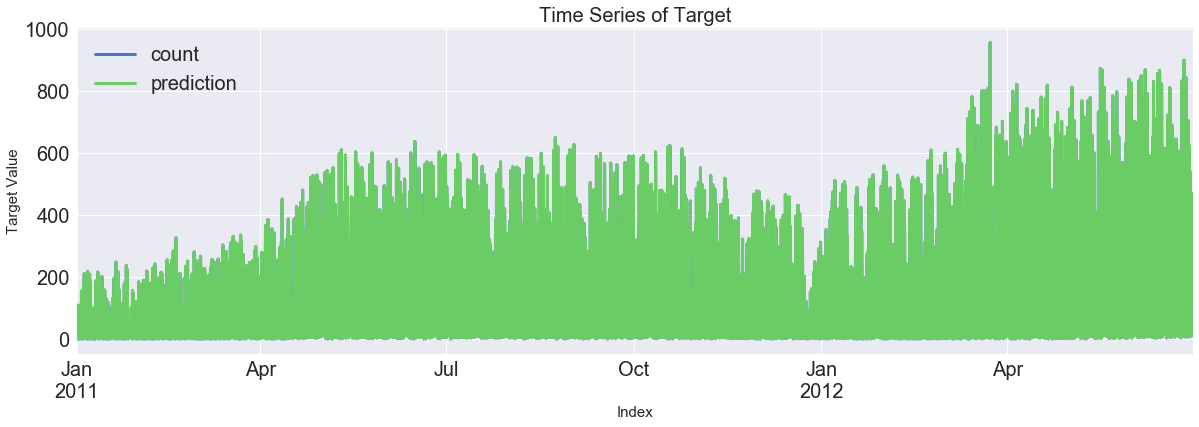

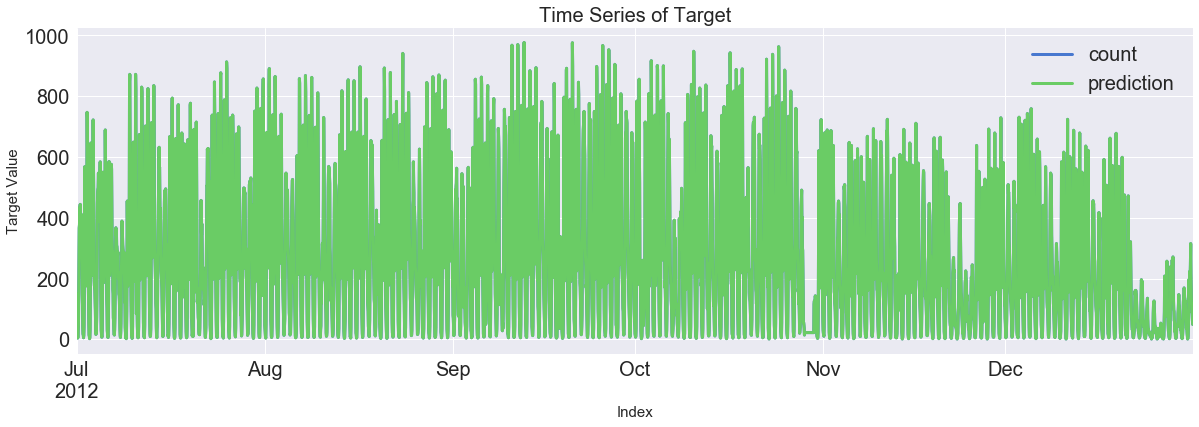

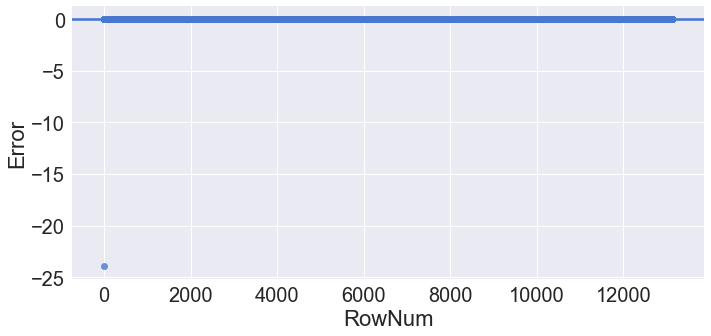

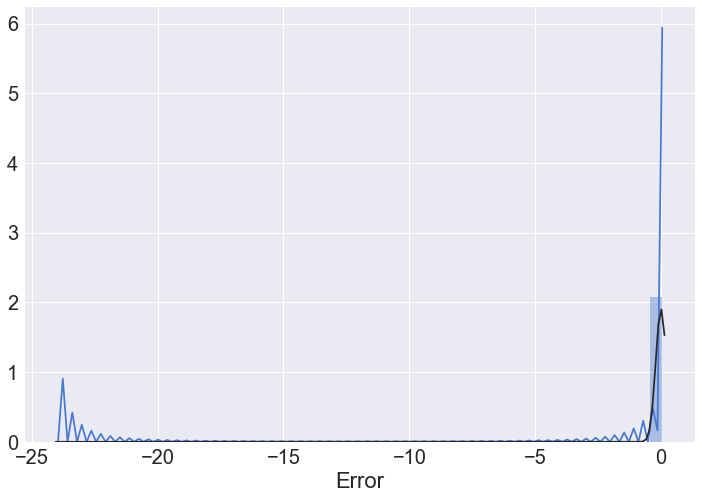

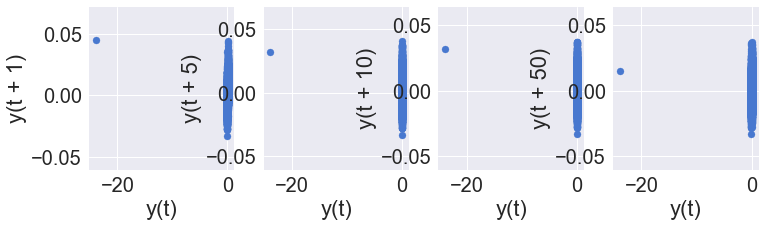

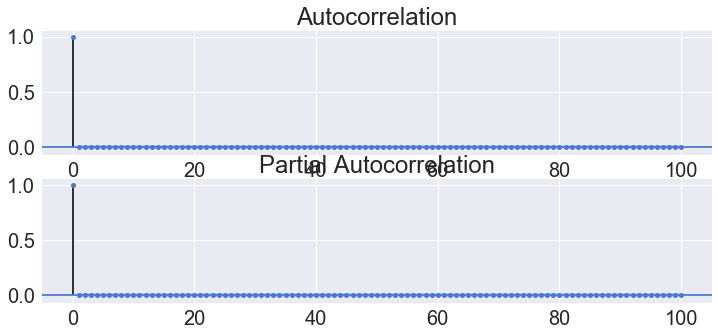

In [107]:
# Data Loading
# location = 'https://raw.githubusercontent.com/cheonbi/DataScience/master/Data/Bike_Sharing_Demand_Full.csv'
location = '../Data/Bike_Sharing_Demand_Full.csv'
raw_all = pd.read_csv(location)

# Feature Engineering
raw_fe = feature_engineering(raw_all)

# Data Split
# Confirm of input and output
Y_colname = ['count']
X_remove = ['datetime', 'DateTime', 'temp_group', 'casual', 'registered']
X_colname = [x for x in raw_fe.columns if x not in Y_colname+X_remove]
X_train_fe, X_test_fe, Y_train_fe, Y_test_fe = datasplit_ts(raw_fe, Y_colname, X_colname, '2012-07-01')

# Applying Base Model
fit_reg1_fe = sm.OLS(Y_train_fe, X_train_fe).fit()
display(fit_reg1_fe.summary())
pred_tr_reg1_fe = fit_reg1_fe.predict(X_train_fe).values
pred_te_reg1_fe = fit_reg1_fe.predict(X_test_fe).values

# Evaluation
Score_reg1_fe, Resid_tr_reg1_fe, Resid_te_reg1_fe = evaluation_trte(Y_train_fe, pred_tr_reg1_fe,
                                                                Y_test_fe, pred_te_reg1_fe, graph_on=True)
display(Score_reg1_fe)

# Error Analysis
error_analysis(Resid_tr_reg1_fe, ['Error'], X_train_fe, graph_on=True)